# Índice <a name = "indice"></a>
1. [Introdução](#introdução)
2. [Bibliotecas Utilizadas](#bibliotecas)
3. [Algortimos Utilizados](#algoritmos) 
4. [Formulação do Problema](#problema)
5. [Análise dos Dados](#análise)
    - [Identificação de Dados](#dados)
6. [Pré-Processamento dos Dados](#pré-processamento)
    - [Substituição de Entradas Vazias](#substituição_entradas_vazias)
7. [Análise Exploratória](#análise_exploratória)
    - [Transformação de String para Integer](#string_integer)
    - [Análise Geral dos Dados](#análise_geral_dados)
    - [Guardar os Dados Tratados](#dados_tratados)
    - [Como Influenciam os Dados o Rating](#influência_dados)
8. [Classificação](#classificação)
    - [Definir o Target](#target)
    - [Teste 1](#teste_1)
    - [Teste 2](#teste_2)
    - [Teste 3](#teste_3)
    - [Teste 4](#teste_4)
    - [Teste 5](#teste_5)
    - [Teste 6](#teste_6)
9. [Comparar Resultados](#comparar_resultados)
10. [Parameter Tuning](#parameter_tuning)
11. [Clustering](#clustering)
12. [Equilibrio de classes através da técnica SMOTE (Synthetic Minority Over-sampling Technique)](#técnica_SMOTE)
13. [Conclusão](#conclusão)

------------------------------------------------------------------------------------------------

# Introdução <a name = "introdução"></a>
[[voltar ao índice]](#indice)

Neste projeto, abordamos um caso real usado na ciência de dados. A ciência de dados tornou-se um campo essencial para extrair informações valiosas e tomar decisões informadas a partir de grandes volumes de dados. A análise exploratória de dados e a aplicação de modelos de supervised learning (aprendizagem supervisionada) desempenham um papel crucial na mesma, permitindo a extração de insights valiosos. Neste projeto abordaremos a aplicação de técnicas de supervised learning para prever a sobrevivência de pacientes com Carcinoma Hepatocelular (HCC). HCC é uma das formas mais comuns e graves de cancro de fígado, exigindo um diagnóstico preciso e tratamentos eficazes para melhorar as taxas de sobrevivência dos pacientes. 

O objetivo principal é desenvolver um pipeline capaz de determinar a capacidade de sobrevivência dos doentes 1 ano após o diagnóstico (“vive” ou “morre”). O projeto abranjará todas as etapas do pipeline de ciência de dados, desde a análise inicial dos dados e pré-processamento até a classificação, comparação e interpretação dos resultados. 


------------------------------------------------------------------------------------------------

# Bibliotecas Utilizadas <a name = "bibliotecas"></a>
[[voltar ao índice]](#indice)

É recomendável a utilização do ambiente visual Anaconda (https://www.anaconda.com/products/individual) para a visualização deste projeto devido à sua oferta ao acesso às bibliotecas Python utilizadas.

* **Pandas**: Utilizada para manipulação e análise de dados de forma eficiente.
* **NumPy**: Utilizada para programação numérica sobre arrays.
* **Scikit-learn**: Fornece implementações eficientes de algoritmos de aprendizagem não supervisionados.
* **Matplotlib e searborn:** Utilizada para visualização de dados.
* **Jupyter notebook**: Ambiente de desenvolvimento interativo para criar e apresentar projetos de ciência de dados.


In [388]:
import time
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV 
from fancyimpute import KNN

------------------------------------------------------------------------------------------------

# Algoritmos Utilizados <a name = "algoritmos"></a>
[[voltar ao índice]](#indice)

A utilização de modelos de classificação de supervised learning como KNN (K-Nearest Neighbors) e Decision Tree  são aplicados neste projeto com o objetivo de desenvolver um pipeline capaz de prever a sobrevivência de pacientes com HCC um ano após o diagnóstico. Permitem assim uma melhor compreensão dos fatores que afetam a sobrevivência e a auxiliar em decisões médicas mais informadas.

* **KNN (K-Nearest Neighbors)**: Classifica novos dados com base na proximidade com os dados já rotulados.
* **Decision Tree**: Modelo de decisão hierárquico, semelhante a uma árvore. 

------------------------------------------------------------------------------------------------

# Formulação do Problema <a name = "problema"></a>
[[voltar ao índice]](#indice)

Objetivo: determinar a capacidade de sobrevivência dos doentes com HCC 1 ano após o diagnóstico. A variável de finalidade será categorizada como “vive” ou “morre”.

● Identifier: **Gender**

● Numerical:**Age**, **Grams_day**, **Packs_year**, **INR**, **AFP**, **Hemoglobin**, **MCV**, **Leucocytes**, **Platelets**,**Albumin**, **Total_Bil**, **ALT**, **AST**,**GGT**, **ALP**, **TP**, **Creatinine**, **Nodules**, **Major_Dim**, **Dir_Bil**, **Iron**, **Sat**, **Ferritin**

● String: **Symptoms**, **Alcohol**, **HBsAg**, **HBeAg**, **HBcAb**, **HCVAb**, **Cirrhosis**, **Endemic**, **Smoking**,**Diabetes**, **Obesity**, **Hemochro**, **AHT**, **CRI**, **HIV**, **NASH**, **Varices**, **Spleno**, **PHT**, **PVT**, **Metastasis**, **Hallmark**,**PS**, **Encephalopathy**, **Ascites**

● Categorical: **Clases** (live or died).

------------------------------------------------------------------------------------------------

# Análise dos Dados <a name = "análise"></a>
[[voltar ao índice]](#indice)

In [389]:
# Ler os dados atribuindo a 'df' o dataset 'hcc_dataset.csv' 
df = pd.read_csv("hcc_dataset.csv", sep = ',')

In [390]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Female,No,Yes,?,?,?,Yes,Yes,No,Yes,...,109,7.6,0.7,5,3,?,?,?,?,Lives
161,Female,Yes,No,?,?,?,?,Yes,No,No,...,280,6.7,0.7,1,2.2,2.3,?,?,?,Dies
162,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,181,7.5,1.46,5,18.6,?,?,?,?,Lives
163,Male,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,...,170,8.4,0.74,5,18,?,?,?,?,Dies


### Identificação de Dados  <a name = "dados"></a>
[[voltar a análise de dados]](#análise)

In [391]:
# Imprimir a parte inicial de 'df'
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


In [392]:
df.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

# Pré-Processamento dos Dados <a name = "pré-processamento"></a>
[[voltar ao índice]](#indice)

Uma vez identificados os problemas existentes com os dados passamos para a sua retificação.

### Substituição de Entradas Vazias <a name = "substituição_entradas_vazias"></a>
[[voltar ao pré-processamento de dados]](#pré-processamento)

In [393]:
# Identificação de dados nulos
(df == '?').sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [394]:
df.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,...,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,...,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,...,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,...,109,6.9,1.8,1,9,?,59,15,22,Lives


-------------------------------------------------------------------------------------------------------------------------------

# Análise Exploratória <a name = "análise_exploratória"></a>
[[voltar ao índice]](#indice)

É importânte perceber como os dados estão distribuidos e relacionados entre si. Podemos fazer esta análise através de gráficos e tabelas. 

### Transformação de String para Integer <a name = "string_integer"></a>
[[voltar à análise exploratória]](#análise_exploratória)

In [395]:
# Função para determinar se uma coluna é categórica e deve ser codificada, ignorando '?'
def should_encode(column):
    unique_values = df[column].unique()
    unique_values = unique_values[unique_values != '?']  # Ignorar '?'
    try:
        # Tenta converter os valores únicos para float
        float_values = unique_values.astype(float)
        # Se conseguir converter todos para float, a coluna é considerada numérica contínua
        return False
    except ValueError:
        # Se não puder converter para float, consideramos categórica
        return True

In [396]:
# Dicionário para armazenar os LabelEncoders usados
label_encoders = {}

# Iterar sobre as colunas do DataFrame e aplicar o LabelEncoder quando necessário
for column in df.columns:
    if should_encode(column):
        le = LabelEncoder()
        # Codificar apenas os valores que não são '?'
        mask = df[column] != '?'
        df.loc[mask, column] = le.fit_transform(df.loc[mask, column].astype(str))
        label_encoders[column] = le

# Certificar que todas as variáveis numéricas estão no formato correto
df = df.apply(pd.to_numeric, errors='coerce')

In [397]:
# Exibir mapeamento de strings para números para cada coluna codificada
for column, le in label_encoders.items():
    print(f'Mapeamento para a coluna: {column}')
    for class_, index in zip(le.classes_, range(len(le.classes_))):
        print(f'{class_}: {index}')
    print('\n')

Mapeamento para a coluna: Gender
Female: 0
Male: 1


Mapeamento para a coluna: Symptoms
No: 0
Yes: 1


Mapeamento para a coluna: Alcohol
No: 0
Yes: 1


Mapeamento para a coluna: HBsAg
No: 0
Yes: 1


Mapeamento para a coluna: HBeAg
No: 0
Yes: 1


Mapeamento para a coluna: HBcAb
No: 0
Yes: 1


Mapeamento para a coluna: HCVAb
No: 0
Yes: 1


Mapeamento para a coluna: Cirrhosis
No: 0
Yes: 1


Mapeamento para a coluna: Endemic
No: 0
Yes: 1


Mapeamento para a coluna: Smoking
No: 0
Yes: 1


Mapeamento para a coluna: Diabetes
No: 0
Yes: 1


Mapeamento para a coluna: Obesity
No: 0
Yes: 1


Mapeamento para a coluna: Hemochro
No: 0
Yes: 1


Mapeamento para a coluna: AHT
No: 0
Yes: 1


Mapeamento para a coluna: CRI
No: 0
Yes: 1


Mapeamento para a coluna: HIV
No: 0
Yes: 1


Mapeamento para a coluna: NASH
No: 0
Yes: 1


Mapeamento para a coluna: Varices
No: 0
Yes: 1


Mapeamento para a coluna: Spleno
No: 0
Yes: 1


Mapeamento para a coluna: PHT
No: 0
Yes: 1


Mapeamento para a coluna: PVT
No: 0
Yes

In [398]:
df

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0.0,0.0,0.0,1.0,1,NaN,NaN,...,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1.0,1,1.0,0.0,1.0,0.0,1,0.0,1.0,...,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0.0,1,NaN,NaN,NaN,1.0,1,0.0,1.0,...,109.0,7.6,0.70,5.0,3.0,NaN,NaN,NaN,NaN,1
161,0,1.0,0,NaN,NaN,NaN,NaN,1,0.0,0.0,...,280.0,6.7,0.70,1.0,2.2,2.3,NaN,NaN,NaN,0
162,1,0.0,1,0.0,0.0,0.0,0.0,1,0.0,1.0,...,181.0,7.5,1.46,5.0,18.6,NaN,NaN,NaN,NaN,1
163,1,0.0,1,1.0,0.0,1.0,1.0,1,1.0,1.0,...,170.0,8.4,0.74,5.0,18.0,NaN,NaN,NaN,NaN,0


###  Análise Geral dos Dados <a name = "análise_geral_dados"></a>
[[voltar à análise exploratória]](#análise_exploratória)

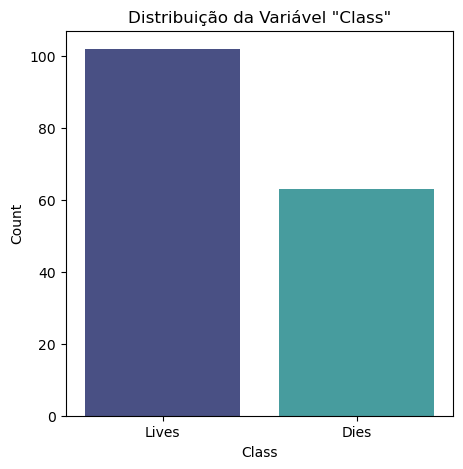

In [399]:
# Verificar a distribuição da variável alvo
df['Class_Label'] = df['Class'].map({0: 'Dies', 1: 'Lives'})

# Verificar a distribuição da variável alvo com os novos rótulos
plt.figure(figsize=(5,5))
sb.countplot(data=df, x='Class_Label', palette='mako') 
plt.title('Distribuição da Variável "Class"')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [400]:
# Contar quantos pacientes estão classificados como "Lives"
(df['Class_Label'] == 'Lives').sum()

102

In [401]:
# Contar quantos pacientes estão classificados como "Dies"
(df['Class_Label'] == 'Dies').sum()

63

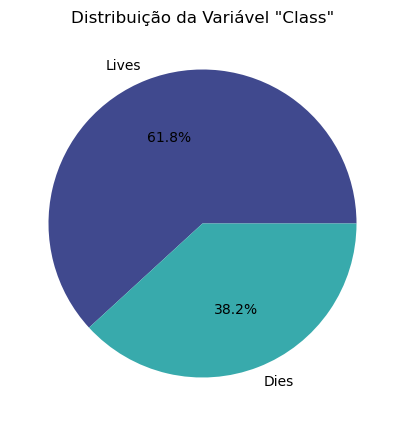

In [402]:
# Calcular a distribuição da variável 'Class'
class_counts = df['Class_Label'].value_counts()
class_percentages = class_counts / class_counts.sum() * 100

# Criar o gráfico de pizza
plt.figure(figsize=(5, 5))
plt.pie(class_percentages, labels=class_percentages.index, autopct='%1.1f%%', colors=sb.color_palette('mako', len(class_percentages)))
plt.title('Distribuição da Variável "Class"')
plt.show()

In [403]:
df.drop(columns=['Class_Label'], inplace=True)

In [404]:
# Utilizar o KNN para preencher os espaços vazios
# Utiliza as 3 linhas mais próximas para preencher os valores em falta em cada linha
# Devolve um np.array que guardamos como um dataframe do pandas
nome_colunas = df.columns
df_filled = pd.DataFrame(KNN(3).fit_transform(df))
df_filled = df_filled.round().astype(int)
df_filled.columns = nome_colunas

Imputing row 1/165 with 4 missing, elapsed time: 0.018
Imputing row 101/165 with 6 missing, elapsed time: 0.027


In [405]:
df_filled.describe()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.806061,0.666667,0.739394,0.096970,0.006061,0.230303,0.236364,0.903030,0.060606,0.381818,...,216.157576,8.939394,1.242424,2.721212,6.436364,1.733333,83.987879,34.709091,436.581818,0.618182
std,0.396586,0.472840,0.440302,0.296817,0.077850,0.422308,0.426141,0.296817,0.239333,0.487311,...,172.172522,11.424565,0.931505,1.792899,5.024684,3.986461,50.863997,25.730313,377.666456,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,109.000000,6.000000,1.000000,1.000000,2.000000,0.000000,42.000000,16.000000,150.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,163.000000,7.000000,1.000000,2.000000,5.000000,1.000000,83.000000,27.000000,342.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,263.000000,8.000000,1.000000,5.000000,9.000000,1.000000,116.000000,49.000000,635.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,980.000000,102.000000,8.000000,5.000000,22.000000,29.000000,224.000000,126.000000,2230.000000,1.000000


In [406]:
df_filled

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7,1,1,4,0,173,78,680,1
1,0,0,0,0,0,0,1,1,0,0,...,111,8,1,1,2,0,187,68,542,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2,5,13,0,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8,1,2,16,0,72,26,385,0
4,1,1,1,1,0,1,0,1,0,1,...,109,7,2,1,9,0,59,15,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,0,0,0,1,1,0,1,...,109,8,1,5,3,0,101,49,604,1
161,0,1,0,0,0,0,1,1,0,0,...,280,7,1,1,2,2,83,26,194,0
162,1,0,1,0,0,0,0,1,0,1,...,181,8,1,5,19,20,24,10,473,1
163,1,0,1,1,0,1,1,1,1,1,...,170,8,1,5,18,1,53,22,388,0


In [407]:
df_filled.isnull()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
161,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
162,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Guardar os Dados Tratados <a name = "dados_tratados"></a>
[[voltar à Análise Exploratória]](#análise_exploratória)

In [408]:
df_filled.to_csv('hcc_dataset_filled.csv', index=False)
df_filled = pd.read_csv('hcc_dataset_filled.csv')

### Como Influenciam os Dados o Rating <a name = "influência_dados"></a>
[[voltar à análise exploratória]](#análise_exploratória)

**Matriz Confusão**

<function matplotlib.pyplot.show(close=None, block=None)>

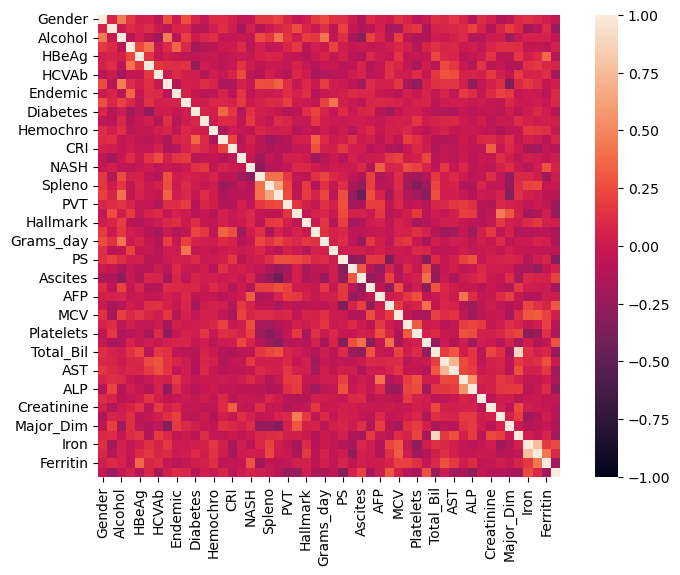

In [409]:
fig=plt.figure(figsize=(9,6))
sb.heatmap(df_filled.corr(numeric_only=True), vmax=1, vmin=-1, square=True)
plt.show

**Matriz De Correlação**

In [410]:
# Correlation matrix
corr = df_filled.corr()
# Renomear as linhas e colunas com os nomes das variáveis
corr.index = df_filled.columns
corr.columns = df_filled.columns
corr.style.background_gradient(cmap='mako')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
Gender,1.000000,0.075872,0.442103,0.160737,0.038303,0.049867,-0.087904,0.253663,-0.003893,0.259292,0.072188,-0.052659,0.103245,0.095716,0.041273,-0.047977,-0.032006,0.162173,0.162230,0.205939,0.073553,-0.037789,0.030195,0.172121,0.247439,0.129555,0.130782,0.005862,-0.138133,0.101264,0.036440,-0.006660,0.132467,0.056002,-0.076285,-0.016858,0.123846,0.091015,0.156223,0.063662,-0.117070,0.103708,0.045516,-0.136534,-0.064370,0.090507,0.121701,0.080485,0.027017,-0.038435
Symptoms,0.075872,1.000000,-0.009763,0.101375,0.055216,0.111965,-0.000000,-0.101375,0.071842,0.079388,-0.098735,-0.091915,0.021262,0.123879,0.026261,-0.192450,0.039904,-0.119919,-0.000000,0.072727,0.124515,0.249029,0.073796,-0.004841,0.137729,-0.093372,0.209540,-0.027042,-0.124334,-0.065486,0.050061,-0.168470,-0.150794,0.109930,0.161704,-0.145084,0.059586,0.071790,0.089440,0.112137,0.213064,0.067350,-0.119980,0.069529,0.189918,0.094889,-0.180176,-0.092218,0.094720,-0.238165
Alcohol,0.442103,-0.009763,1.000000,-0.085396,0.046359,-0.068765,-0.189668,0.458652,-0.080658,0.210813,0.003330,0.093579,0.124961,-0.024015,-0.033330,-0.022546,-0.058826,0.251077,0.162693,0.400272,0.146480,0.012764,0.191640,0.162934,0.417335,-0.053771,0.123423,-0.161701,-0.291321,0.217796,0.071124,-0.118808,0.194073,-0.070601,-0.133650,-0.136089,0.019918,-0.002680,0.047151,0.097124,-0.110213,-0.095284,0.006307,0.023266,-0.182555,-0.025939,0.047505,0.041707,0.058194,-0.040302
HBsAg,0.160737,0.101375,-0.085396,1.000000,0.238293,0.404490,-0.037689,0.107383,0.345942,0.079713,-0.198365,-0.121702,-0.068974,-0.000513,0.003803,0.108696,-0.073971,0.045955,-0.046927,-0.028964,0.074834,0.174012,-0.086300,0.021509,-0.004467,0.218345,0.030852,-0.036225,-0.006752,-0.032877,-0.022023,0.018657,0.087966,0.035194,-0.089868,0.066732,0.139380,0.077654,0.084976,-0.012784,0.024279,-0.048605,0.068834,0.119858,0.122728,0.114745,-0.041118,-0.033809,-0.055826,0.046755
HBeAg,0.038303,0.055216,0.046359,0.238293,1.000000,0.142754,-0.043444,0.025589,-0.019834,-0.061369,-0.057491,-0.029001,-0.016436,-0.060584,-0.029001,-0.010626,-0.017627,0.052971,0.076680,0.055216,-0.041251,-0.041251,-0.115111,-0.009943,0.075929,-0.025243,0.040495,-0.093321,-0.137304,0.091602,0.002188,-0.033926,0.149757,-0.040147,-0.032094,-0.043580,0.231357,0.091519,0.074110,-0.065405,-0.031916,-0.006440,0.147784,-0.075193,-0.069154,0.162421,0.033896,0.098295,0.358458,-0.099359
HBcAb,0.049867,0.111965,-0.068765,0.404490,0.142754,1.000000,0.170027,0.130604,0.102376,0.133062,-0.251979,0.017375,-0.043717,-0.067730,-0.026731,0.141040,0.010561,-0.062721,-0.009947,-0.010179,-0.044992,0.059567,-0.031736,-0.107594,-0.033834,-0.013034,-0.097577,-0.063308,0.064860,-0.115982,-0.050691,0.128510,0.072465,-0.054517,-0.156202,0.026109,-0.097914,0.235913,0.168983,-0.009266,-0.109103,0.140667,-0.065289,-0.027430,-0.107993,-0.111797,0.133549,0.166132,0.072176,0.074342
HCVAb,-0.087904,-0.000000,-0.189668,-0.037689,-0.043444,0.170027,1.000000,-0.010518,0.097832,0.032566,0.008692,-0.119205,0.024450,-0.019279,0.055629,0.244600,-0.059170,-0.113892,0.032686,-0.030261,-0.121203,0.086036,0.008933,-0.150339,-0.121230,-0.086671,-0.069927,0.010229,0.056438,-0.098204,-0.035701,0.134351,0.021816,0.006906,0.107586,-0.020723,0.162090,0.286581,0.260625,0.047561,0.058911,0.031767,0.177349,0.038888,-0.048463,0.177314,0.061178,0.074710,0.111552,-0.150017
Cirrhosis,0.253663,-0.101375,0.458652,0.107383,0.025589,0.130604,-0.010518,1.000000,-0.088436,0.046755,0.026778,0.121702,0.068974,-0.126351,-0.129308,0.044593,-0.021382,0.262639,0.251769,0.333089,0.123522,-0.025245,0.086300,-0.001458,0.187465,0.025572,-0.003035,-0.060702,-0.166557,0.102425,0.0395

**Correlação das variáveis com a variável 'Class'**

As 10 variáveis menos correlacionadas com 'Class' são:
AFP         0.002091
ALT         0.003294
HIV         0.013581
Hemochro    0.020256
Spleno      0.023139
Obesity     0.024323
TP          0.026087
Hallmark    0.030757
Varices     0.030757
MCV         0.033591
Name: Class, dtype: float64


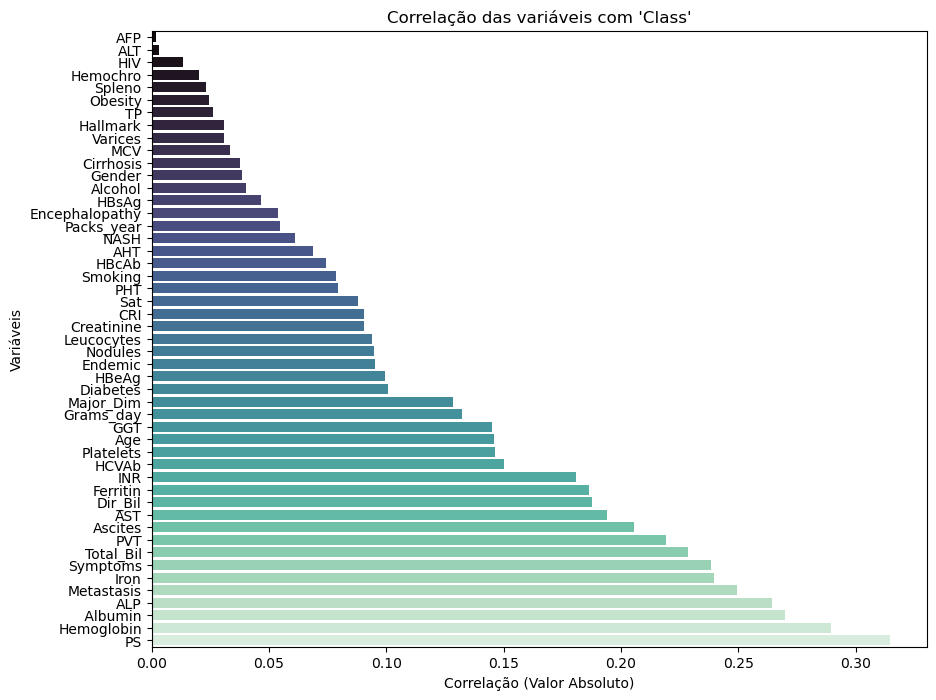

In [411]:
# Calcular a matriz de correlação
corr_matrix = df_filled.corr()

# Obter a série de correlação com a variável 'Class'
class_correlation = corr_matrix['Class'].drop('Class')  # Remove a autocorrelação

# Calcular o valor absoluto das correlações
abs_class_correlation = class_correlation.abs()

# Ordenar as correlações em ordem crescente
least_correlated_with_class = abs_class_correlation.sort_values(ascending=True)

# Mostrar as 10 variáveis menos correlacionadas com 'Class'
print("As 10 variáveis menos correlacionadas com 'Class' são:")
print(least_correlated_with_class.head(10))

# Plotar a correlação das variáveis com 'Class'
plt.figure(figsize=(10, 8))
sb.barplot(x=least_correlated_with_class.values, y=least_correlated_with_class.index, palette='mako')
plt.title("Correlação das variáveis com 'Class'")
plt.xlabel("Correlação (Valor Absoluto)")
plt.ylabel("Variáveis")
plt.show()

**Violine Plot**

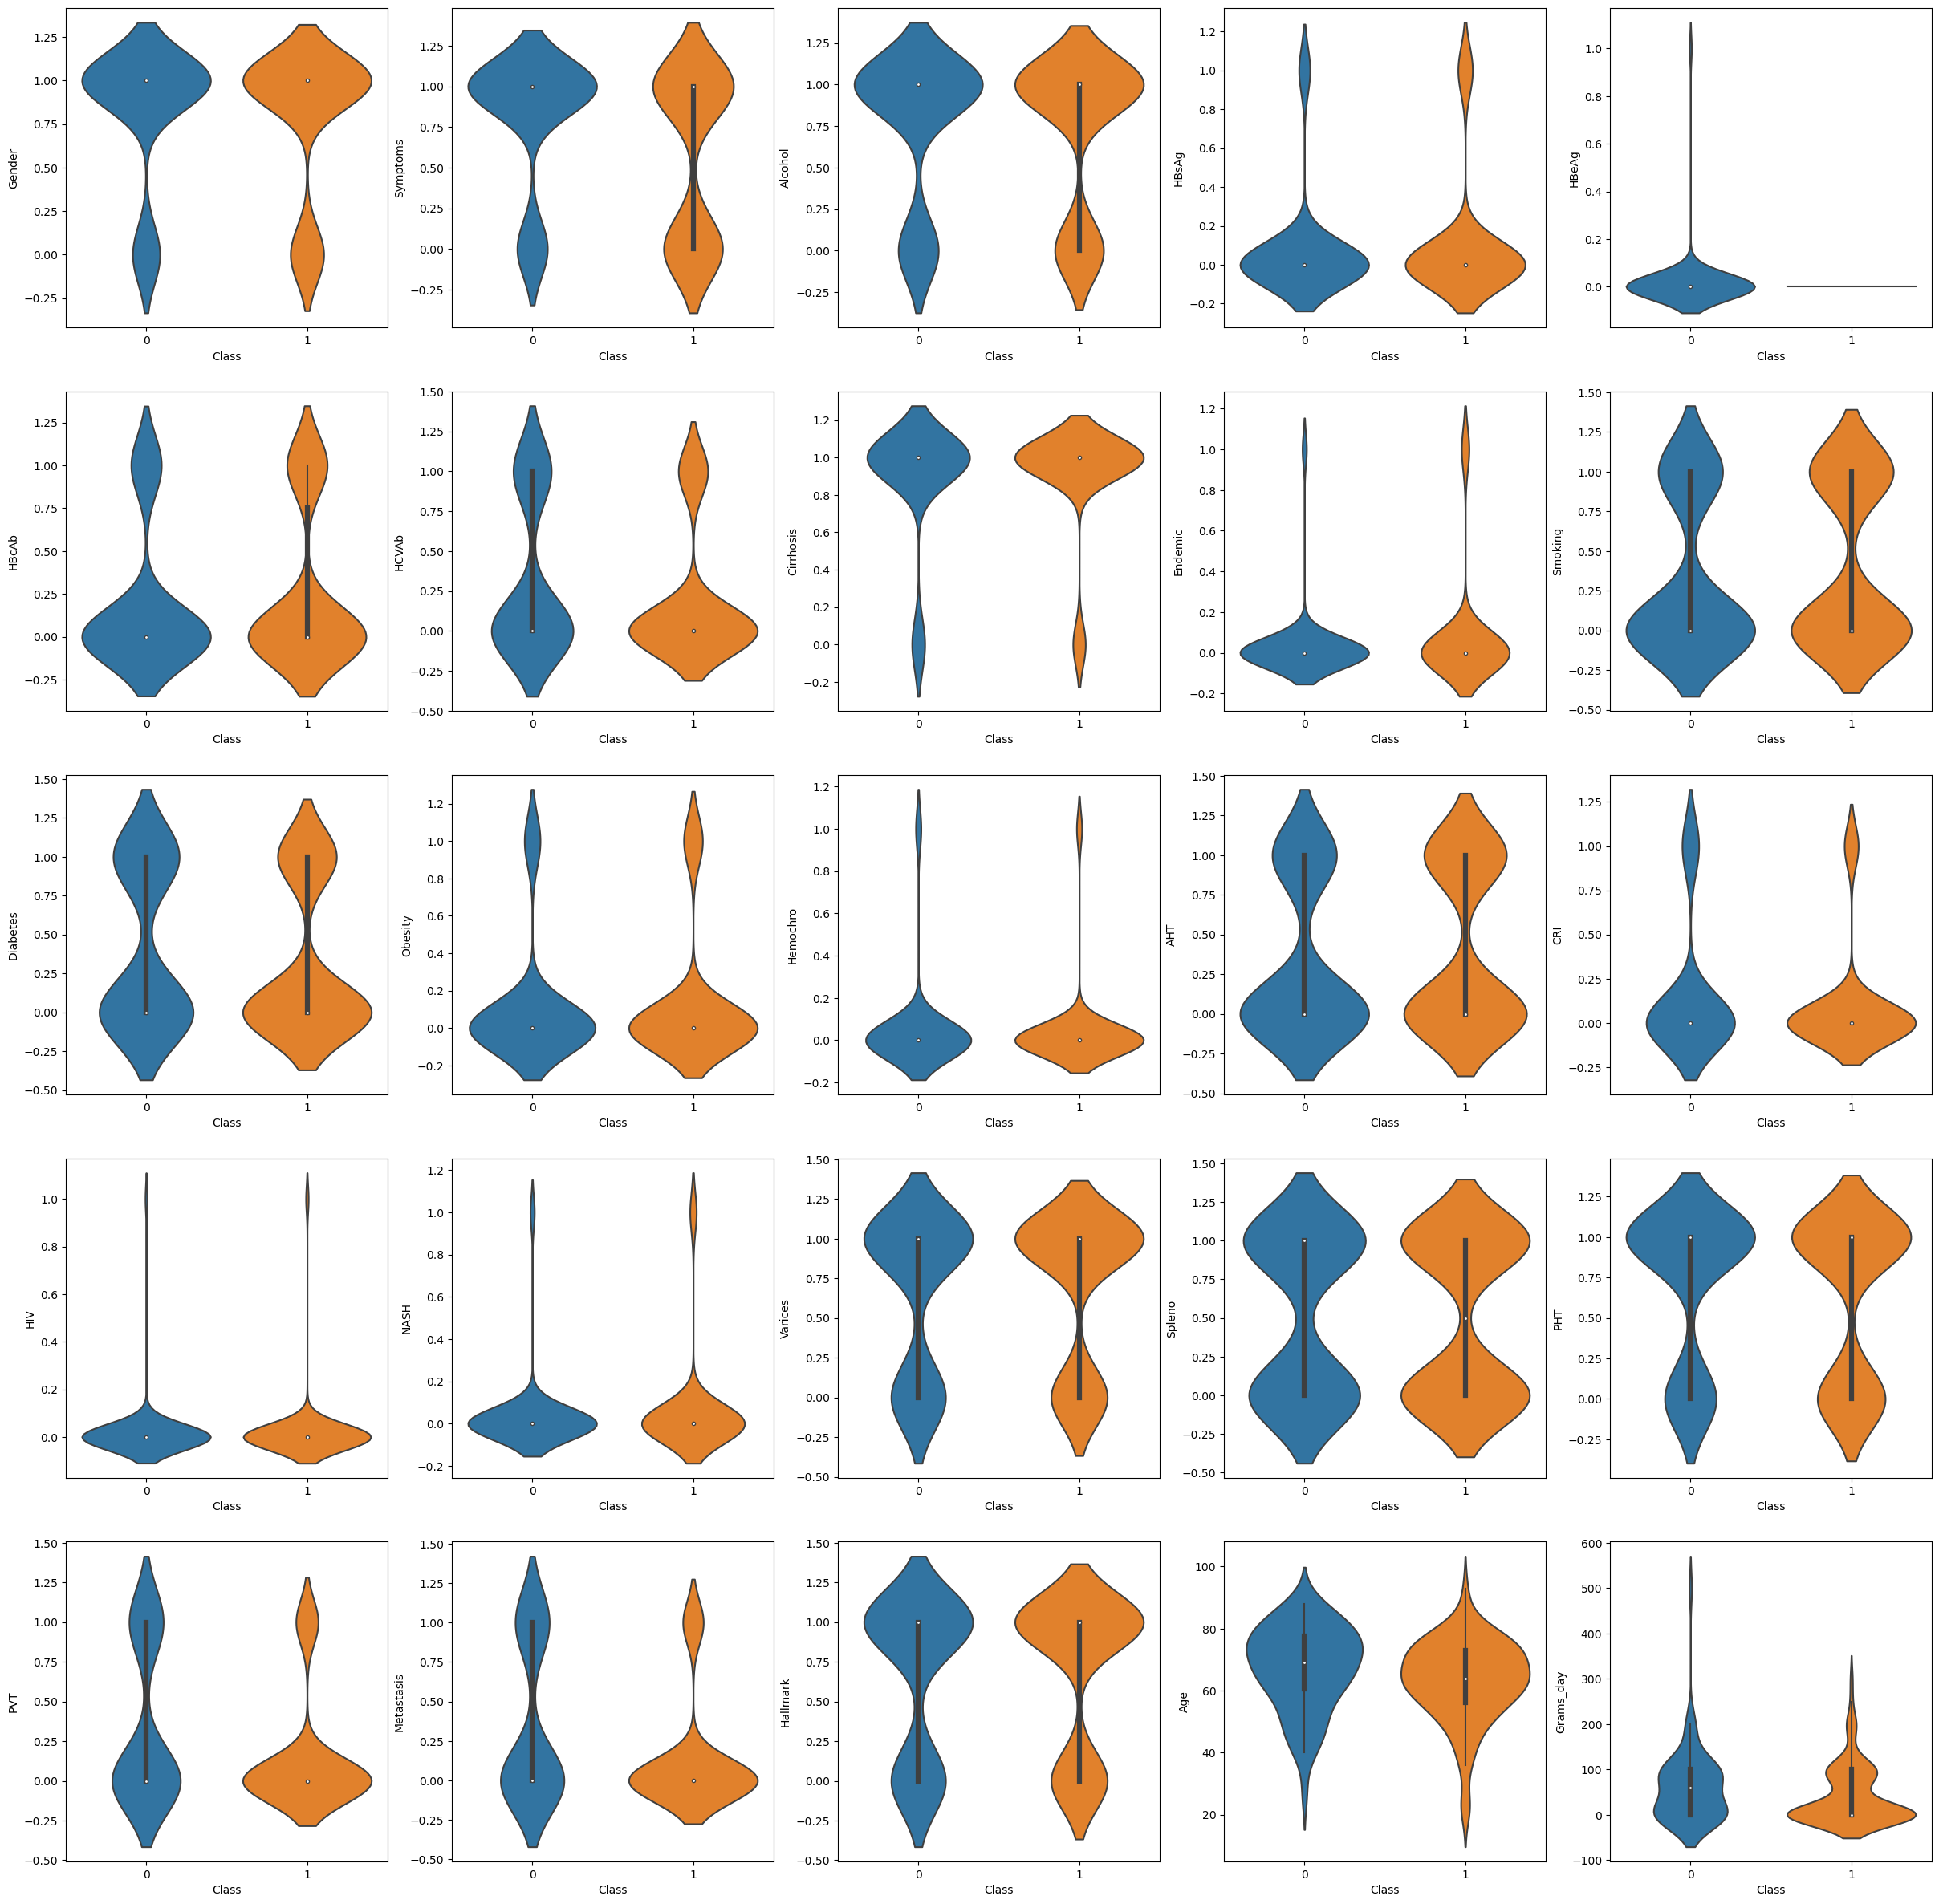

In [412]:
plt.figure(figsize=(30, 30))

colunas = df_filled.columns[:25]

for column_index, column in enumerate(colunas):
    if column != 'Class':
        plt.subplot(5, 5, column_index + 1)
        sb.violinplot(x='Class', y=column, data=df_filled)

plt.show()

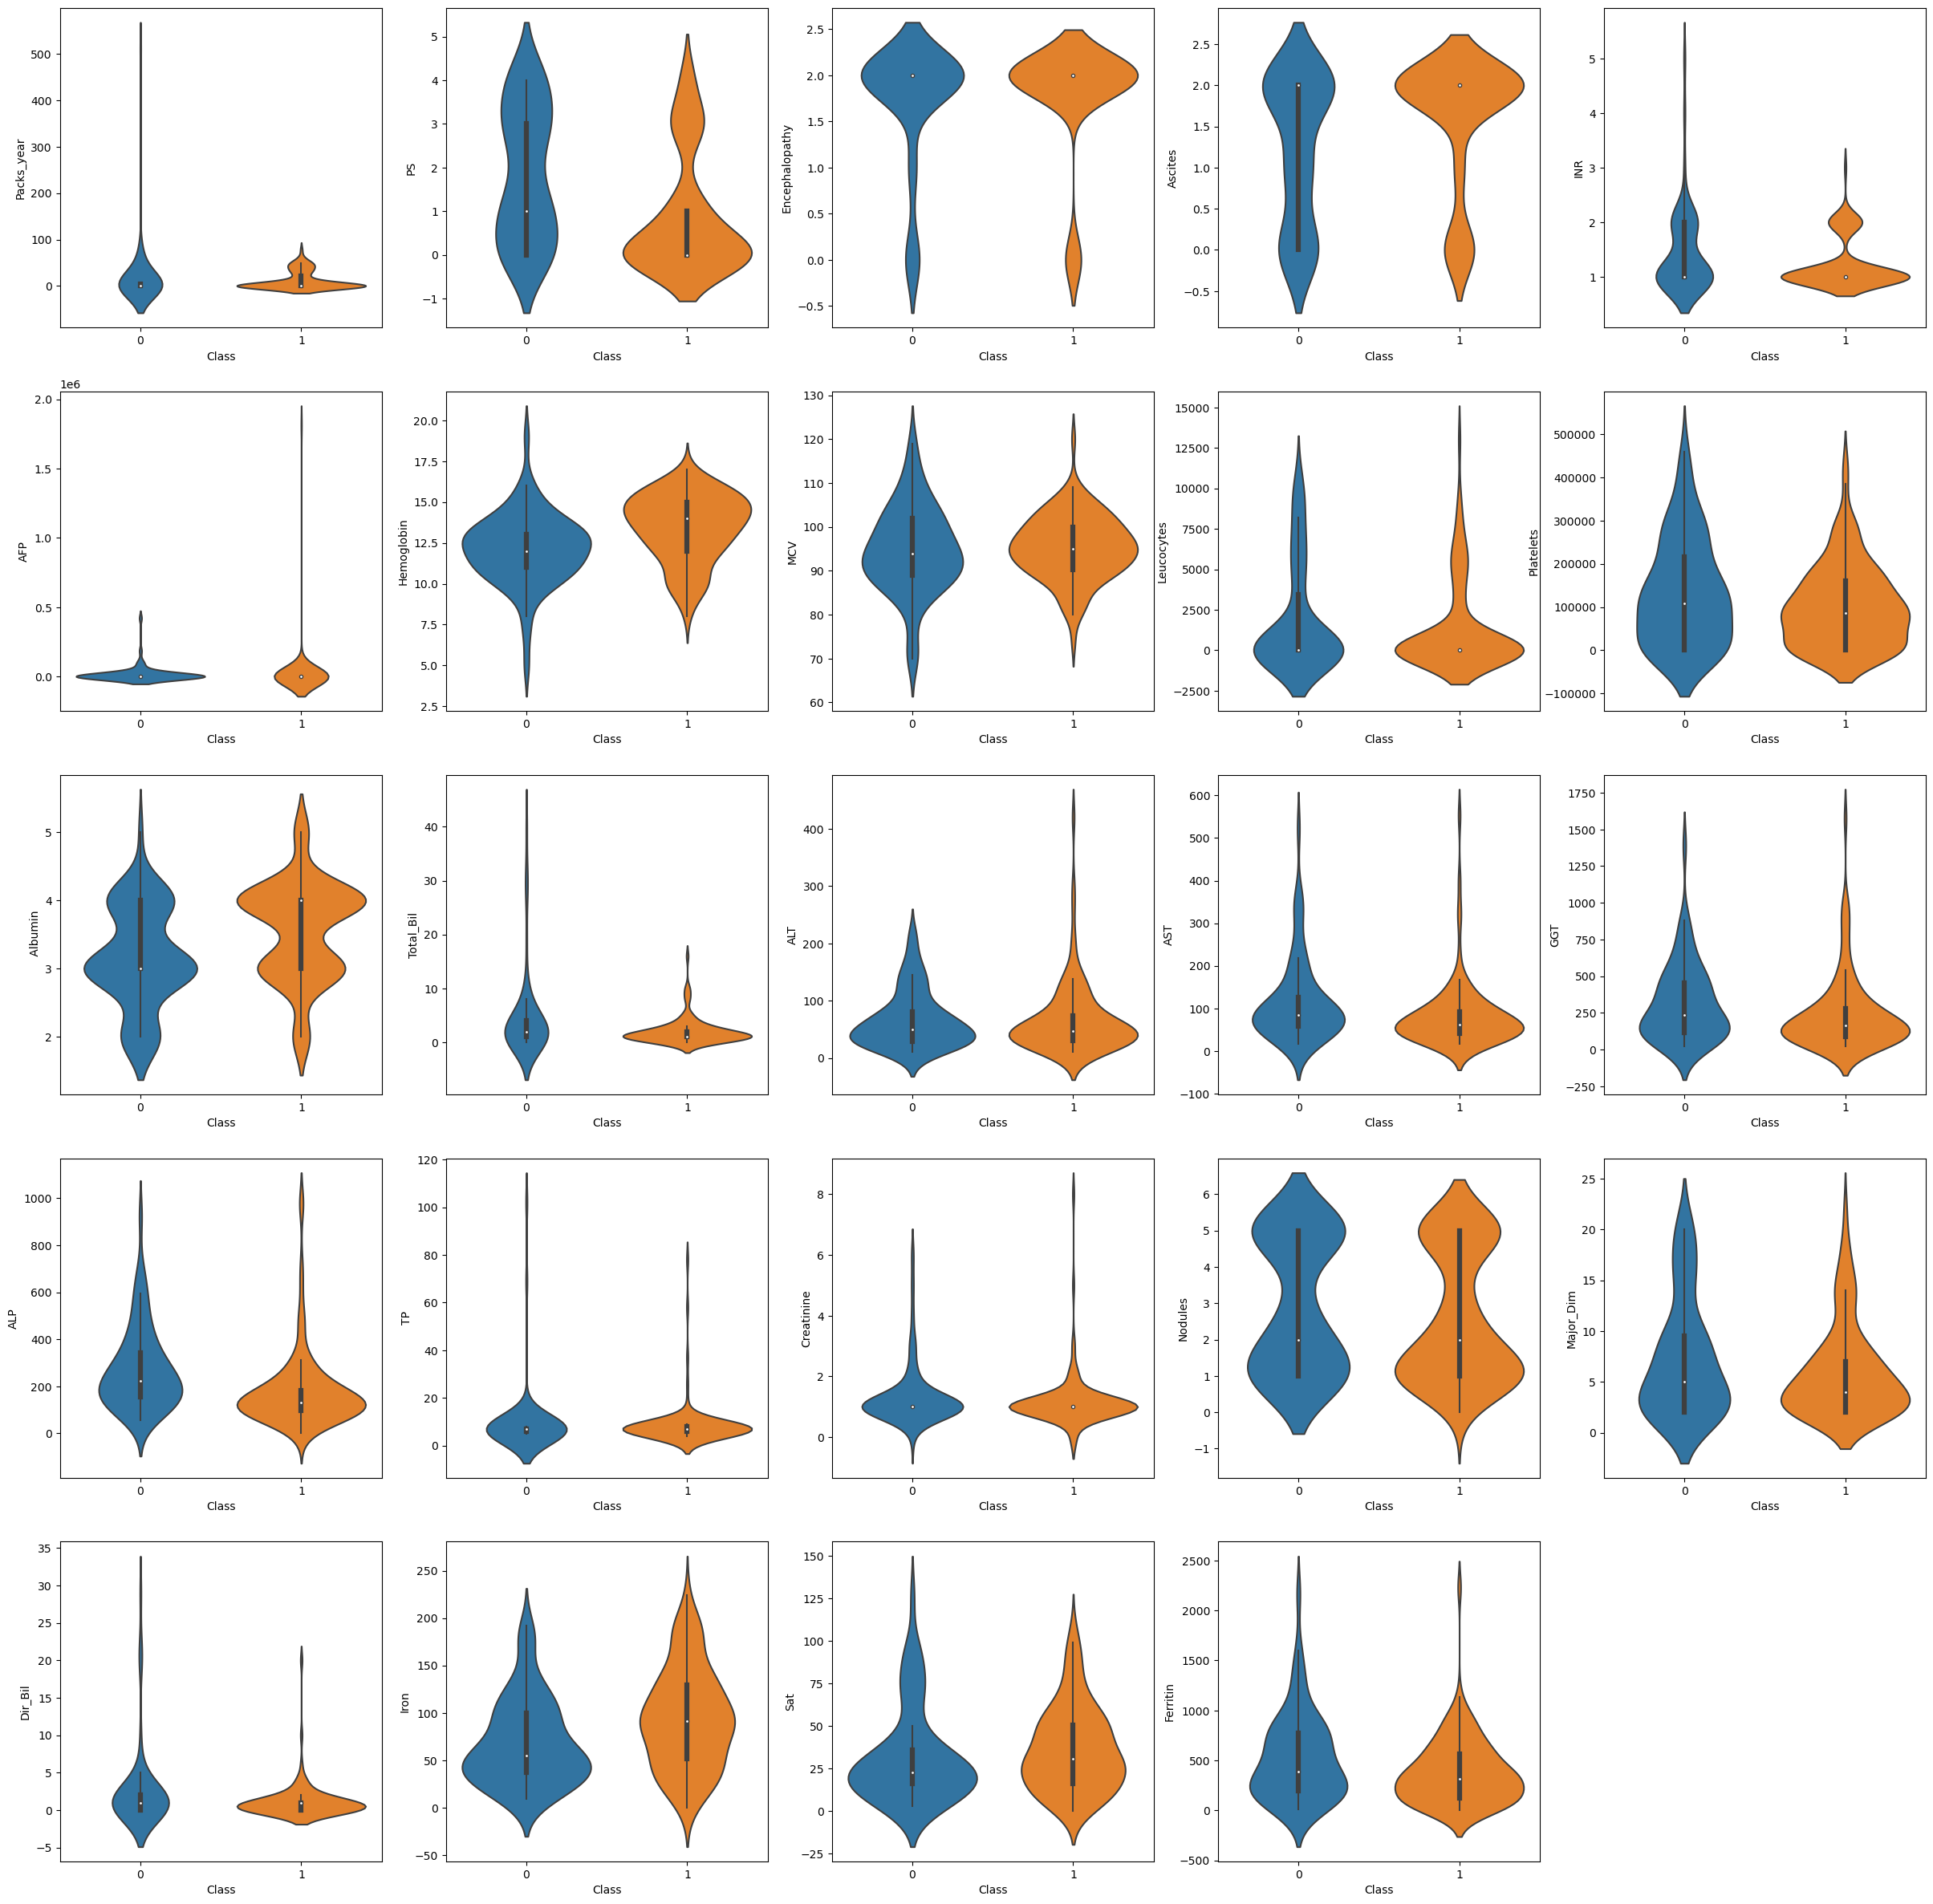

In [413]:
plt.figure(figsize=(30, 30))

colunas = df_filled.columns[25:]

for column_index, column in enumerate(colunas):
    if column != 'Class':
        plt.subplot(5, 5, column_index + 1)
        sb.violinplot(x='Class', y=column, data=df_filled)

plt.show()

Como podemos observar, nem todos os gráficos influênciam da mesma forma a 'Class'.

---------------------------------------------------------------------------------------------------------------------------------------------------------

## Classificação <a name = "classificação"></a>
[[voltar ao índice]](#indice)

# Definir o Target <a name = "target"></a>
[[voltar a classificação]](#classificação)

In [414]:
target_c = df_filled['Class']

In [415]:
inputs_c = df_filled

## Teste 1 <a name = "teste_1"></a>
   - [Configuração dos Dados](#configurar_dados_1)
   - [Decision Tree](#decision_tree_1)
   - [K-NN](#k-nn_1)
   - [Importância das Variáveis](#importância_variáveis_1)
    
[[voltar a classificação]](#classificação)

Começamos por realizar os testes com todos os dados disponiveis.

### Configuração dos Dados <a name = "configurar_dados_1"></a>
[[voltar a Teste 1]](#teste_1)


- **inputs_train** = onde se vão buscar os dados
- **inputs_test** = dados escolhidos de modo random para serem testados 
- **target_train** = resultados obtidos a partir do 'treino'
- **target_test** = dados utilizados para validar os resultados do 'treino'
- **inputs_c** = conjunto de entrada que contém os atributos utilizados para treinar e testar o modelo.
- **targert_c** = conjunto de dados que contém as avaliações dos resultados que pretendenmos prever.

In [416]:
from sklearn.model_selection import train_test_split

(inputs_train,
 inputs_test,
 target_train,
 target_test) = train_test_split(inputs_c, target_c, test_size = 0.15, random_state = 1)

In [417]:
inputs_train

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
54,1,1,1,0,0,0,1,1,0,1,...,397,7,1,1,2,6,56,27,742,0
5,1,0,1,0,0,0,0,1,0,0,...,396,6,1,1,10,1,53,22,111,0
89,1,0,1,0,0,1,0,1,0,1,...,474,4,3,1,2,1,198,108,895,1
95,1,0,0,0,0,0,0,0,0,0,...,124,7,2,1,6,0,15,7,810,0
16,1,0,1,0,0,0,0,1,0,1,...,235,6,1,2,2,3,136,95,767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,1,0,0,0,0,1,0,0,0,...,587,7,2,5,16,1,14,5,149,0
137,0,1,0,0,0,0,0,0,0,0,...,141,7,1,1,10,3,91,31,80,1
72,1,1,1,0,0,0,0,1,0,1,...,1,7,2,5,4,1,26,15,227,1
140,0,1,0,0,0,0,0,1,0,0,...,302,7,1,5,9,2,102,49,206,0


In [418]:
inputs_test

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
44,0,0,0,0,0,1,1,1,0,0,...,97,7,1,5,2,0,54,20,259,1
47,1,1,1,0,0,0,0,1,0,0,...,595,7,1,1,2,4,63,34,888,0
158,1,1,0,0,0,0,0,1,0,0,...,263,7,1,1,8,1,121,43,363,1
66,1,1,1,0,0,1,0,1,0,1,...,113,8,1,2,6,0,94,33,393,1
145,1,1,1,0,0,0,0,1,0,0,...,141,26,1,1,15,0,52,15,132,1
11,1,0,1,0,0,0,1,1,1,0,...,154,7,8,5,2,0,144,41,277,1
78,1,1,1,0,0,0,0,1,0,0,...,88,6,1,5,5,0,19,8,141,1
35,1,1,0,1,0,1,0,1,0,0,...,113,7,1,3,9,0,126,40,334,1
99,1,0,1,0,0,0,0,1,0,0,...,66,6,1,5,7,6,72,25,92,1
14,1,0,1,0,0,0,0,1,0,0,...,163,7,1,4,4,4,197,84,302,1


In [419]:
target_train

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [420]:
target_test

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_1"></a>
[[voltar a Teste 1]](#teste_1)

Começamos por calcular uma pontuação e depois efetuamos testes sucessivos para calcular a pontuação média. Em seguida, executamos um ciclo que avalia a árvore de decisão várias vezes e armazena os resultados numa lista.

In [421]:
from sklearn.tree import DecisionTreeClassifier

#tempo
tempo_i = time.time()

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(inputs_test, target_test)
dt_score = dt_classifier.score(inputs_train, target_train)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 1.0
Tempo que demorou: 0.013 segundos 



Tempo que demorou: 1.145 segundos 



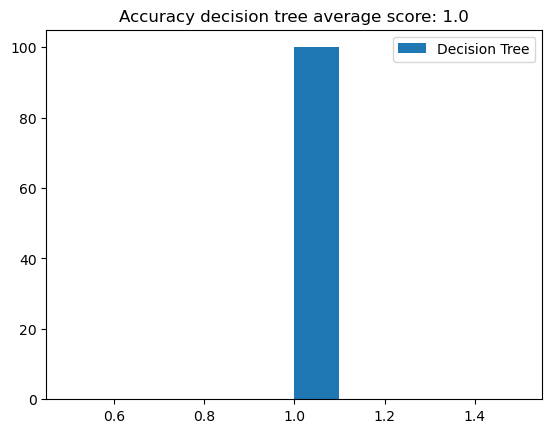

In [422]:
model_accuracies_dt = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_c,target_c,test_size=0.15,random_state=42)
    
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(inputs_test, target_test)
    dt_classifier_accuracy = dt_classifier.score(inputs_train, target_train)
    model_accuracies_dt.append(dt_classifier_accuracy)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_dt, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_1"></a>
[[voltar a Teste 1]](#teste_1)

Repetimos o processo realizado em [Decision Tree](#decision_tree).

In [423]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(inputs_train, target_train.values.ravel()) 
knn_score = knn_classifier.score(inputs_test, target_test.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.56
Tempo que demorou: 0.052 segundos 



Tempo que demorou: 3.044 segundos 



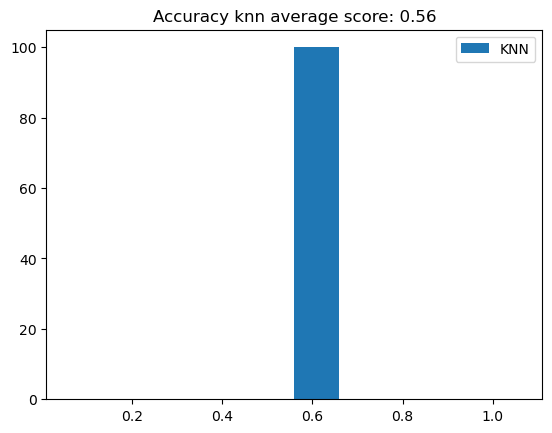

In [424]:
model_accuracies_knn = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_c,target_c,test_size=0.15,random_state=42)
    
    knn_classifier = KNeighborsClassifier()
    knn_classifier.fit(inputs_train, target_train.values.ravel())
    knn_classifier_accuracy = knn_classifier.score(inputs_test, target_test.values.ravel())
    model_accuracies_knn.append(knn_classifier_accuracy)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_knn, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy)));
plt.legend()
plt.show()

### Importância das Variáveis <a name = "importância_variáveis_1"></a>
[[voltar a Teste 1]](#teste_1)

In [425]:
def importance(classifier):
    feature_importance=pd.DataFrame({'feature':inputs_train.columns,
                             'importance':np.round(classifier.feature_importances_, 3)})
    feature_importance.sort_values('importance',ascending=False, inplace =True)
    feature_importance = feature_importance[feature_importance.importance > 0]
    return feature_importance

In [426]:
importance(dt_classifier)

,feature,importance
49,Class,1.0


## Teste 2 <a name = "teste_2"></a>
   - [Configuração dos Dados](#configurar_dados_2)
   - [Decision Tree](#decision_tree_2)
   - [K-NN](#k-nn_2)
   - [Cross-Validation](#cross_validation_2)
    
[[voltar a classificação]](#classificação)

Removemos as 6 variáveis menos correlacionadas.

### Configuração dos Dados <a name = "configurar_dados_2"></a>
[[voltar a Teste 2]](#teste_2)

In [427]:
# Remover as 6 variáveis menos correlacionadas
columns_to_drop = ['AFP', 'ALT', 'HIV', 'Hemochro', 'Spleno', 'Obesity', 'Class']
inputs_2 = df_filled.drop(columns=columns_to_drop)

In [428]:
from sklearn.model_selection import train_test_split

(inputs_train_2,
 inputs_test_2,
 target_train_2,
 target_test_2) = train_test_split(inputs_c, target_c, test_size = 0.15, random_state = 1)

In [429]:
inputs_train_2

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
54,1,1,1,0,0,0,1,1,0,1,...,397,7,1,1,2,6,56,27,742,0
5,1,0,1,0,0,0,0,1,0,0,...,396,6,1,1,10,1,53,22,111,0
89,1,0,1,0,0,1,0,1,0,1,...,474,4,3,1,2,1,198,108,895,1
95,1,0,0,0,0,0,0,0,0,0,...,124,7,2,1,6,0,15,7,810,0
16,1,0,1,0,0,0,0,1,0,1,...,235,6,1,2,2,3,136,95,767,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0,1,0,0,0,0,1,0,0,0,...,587,7,2,5,16,1,14,5,149,0
137,0,1,0,0,0,0,0,0,0,0,...,141,7,1,1,10,3,91,31,80,1
72,1,1,1,0,0,0,0,1,0,1,...,1,7,2,5,4,1,26,15,227,1
140,0,1,0,0,0,0,0,1,0,0,...,302,7,1,5,9,2,102,49,206,0


In [430]:
inputs_test_2

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
44,0,0,0,0,0,1,1,1,0,0,...,97,7,1,5,2,0,54,20,259,1
47,1,1,1,0,0,0,0,1,0,0,...,595,7,1,1,2,4,63,34,888,0
158,1,1,0,0,0,0,0,1,0,0,...,263,7,1,1,8,1,121,43,363,1
66,1,1,1,0,0,1,0,1,0,1,...,113,8,1,2,6,0,94,33,393,1
145,1,1,1,0,0,0,0,1,0,0,...,141,26,1,1,15,0,52,15,132,1
11,1,0,1,0,0,0,1,1,1,0,...,154,7,8,5,2,0,144,41,277,1
78,1,1,1,0,0,0,0,1,0,0,...,88,6,1,5,5,0,19,8,141,1
35,1,1,0,1,0,1,0,1,0,0,...,113,7,1,3,9,0,126,40,334,1
99,1,0,1,0,0,0,0,1,0,0,...,66,6,1,5,7,6,72,25,92,1
14,1,0,1,0,0,0,0,1,0,0,...,163,7,1,4,4,4,197,84,302,1


In [431]:
target_train_2

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [432]:
target_test_2

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_2"></a>
[[voltar a Teste 2]](#teste_2)

In [433]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_2 = DecisionTreeClassifier()
dt_classifier_2.fit(inputs_test_2, target_test_2)
dt_score_2 = dt_classifier_2.score(inputs_train_2, target_train_2)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_2)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 1.0
Tempo que demorou: 0.017 segundos 



Tempo que demorou: 1.876 segundos 



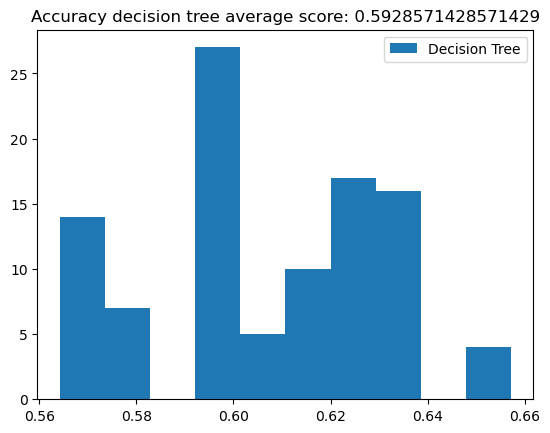

In [434]:
model_accuracies_dt_2 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_2,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_2 = DecisionTreeClassifier()
    dt_classifier_2.fit(inputs_test_2, target_test_2)
    dt_classifier_accuracy_2 = dt_classifier_2.score(inputs_train_2, target_train_2)
    model_accuracies_dt_2.append(dt_classifier_accuracy_2)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_dt_2, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_2)));
plt.legend()
plt.show()

### K-NN <a name = "k-nn_2"></a>
[[voltar a Teste 2]](#teste_2)

In [435]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_2 = KNeighborsClassifier()
knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_2 = knn_classifier_2.score(inputs_test_2, target_test_2.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)


print("Score knn:", knn_score_2)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.52
Tempo que demorou: 0.041 segundos 



Tempo que demorou: 1.115 segundos 



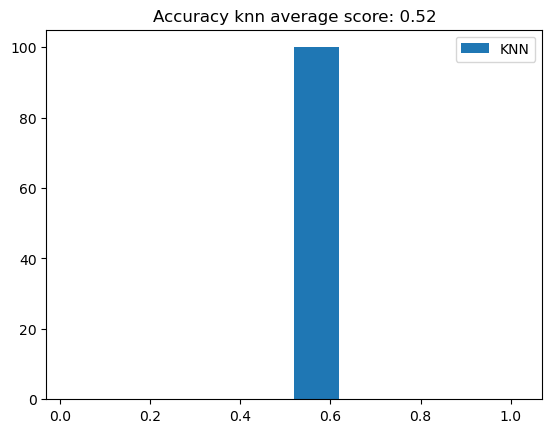

In [436]:
model_accuracies_knn_2 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_2, inputs_test_2, target_train_2, target_test_2 = train_test_split(inputs_2,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_2 = KNeighborsClassifier()
    knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel())
    knn_classifier_accuracy_2 = knn_classifier_2.score(inputs_test_2, target_test_2.values.ravel()) 
    model_accuracies_knn_2.append(knn_classifier_accuracy_2)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

plt.hist(model_accuracies_knn_2, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_2)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_2"></a>
[[voltar a Teste 2]](#teste_2)

A Cross-Validation é uma técnica utilizada em machine learning para avaliar o desempenho e capacidade de generalização de um modelo.

In [437]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_2, target_train_2, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=4)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

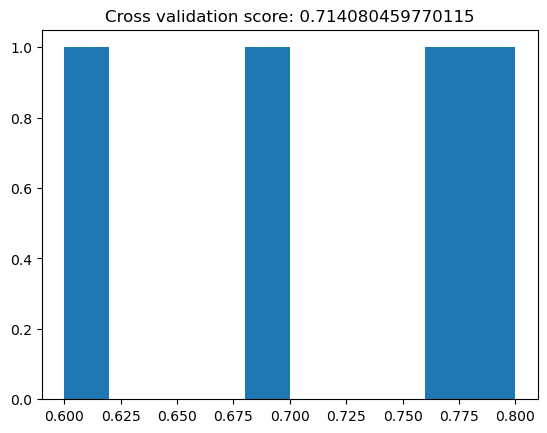

In [438]:
dt_classifier_2 = DecisionTreeClassifier()
dt2 = dt_classifier_2.fit(inputs_train_2, target_train_2)
cross(dt2)

#### K-NN

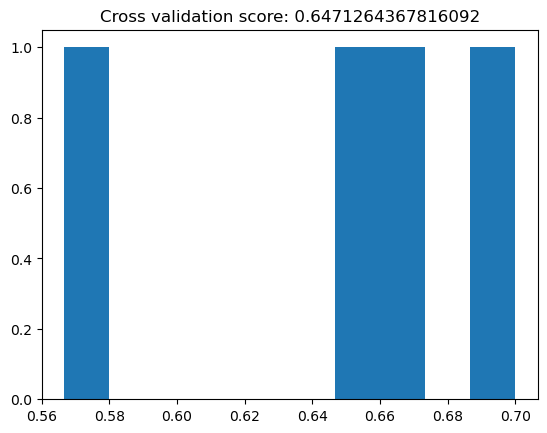

In [439]:
knn_classifier_2 = KNeighborsClassifier()
knn2 = knn_classifier_2.fit(inputs_train_2, target_train_2.values.ravel())
cross(knn2)

## Teste 3 <a name = "teste_3"></a>
   - [Configuração dos Dados](#configurar_dados_3)
   - [Decision Tree](#decision_tree_3)
   - [K-NN](#k-nn_3)
   - [Cross-Validation](#cross_validation_3)
    
[[voltar a classificação]](#classificação)

### Configuração dos Dados <a name = "configurar_dados_3"></a>
[[voltar a Teste 3]](#teste_3)

In [440]:
# Remover as seguintes 6 variáveis menos correlacionadas
columns_to_drop = ['TP', 'Hallmark', 'Varices', 'MCV', 'Cirrhosis', 'Gender']
inputs_3 = inputs_2.drop(columns=columns_to_drop)

In [441]:
from sklearn.model_selection import train_test_split

(inputs_train_3,
 inputs_test_3,
 target_train_3,
 target_test_3) = train_test_split(inputs_3, target_c, test_size = 0.15, random_state = 1)

In [442]:
inputs_train_3

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Endemic,Smoking,Diabetes,AHT,...,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
54,1,1,0,0,0,1,0,1,0,0,...,523,433,397,1,1,2,6,56,27,742
5,0,1,0,0,0,0,0,0,0,0,...,122,242,396,1,1,10,1,53,22,111
89,0,1,0,0,1,0,0,1,0,0,...,51,993,474,3,1,2,1,198,108,895
95,0,0,0,0,0,0,0,0,0,0,...,17,44,124,2,1,6,0,15,7,810
16,0,1,0,0,0,0,0,1,1,0,...,63,201,235,1,2,2,3,136,95,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,0,0,0,0,1,0,0,0,1,...,102,739,587,2,5,16,1,14,5,149
137,1,0,0,0,0,0,0,0,0,0,...,29,82,141,1,1,10,3,91,31,80
72,1,1,0,0,0,0,0,1,0,1,...,80,177,1,2,5,4,1,26,15,227
140,1,0,0,0,0,0,0,0,0,0,...,58,229,302,1,5,9,2,102,49,206


In [443]:
inputs_test_3

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Endemic,Smoking,Diabetes,AHT,...,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
44,0,0,0,0,1,1,0,0,0,0,...,52,72,97,1,5,2,0,54,20,259
47,1,1,0,0,0,0,0,0,0,0,...,244,795,595,1,1,2,4,63,34,888
158,1,0,0,0,0,0,0,0,1,0,...,59,450,263,1,1,8,1,121,43,363
66,1,1,0,0,1,0,0,1,0,0,...,52,275,113,1,2,6,0,94,33,393
145,1,1,0,0,0,0,0,0,1,1,...,51,983,141,1,1,15,0,52,15,132
11,0,1,0,0,0,1,1,0,0,1,...,168,113,154,8,5,2,0,144,41,277
78,1,1,0,0,0,0,0,0,0,0,...,43,23,88,1,5,5,0,19,8,141
35,1,0,1,0,1,0,0,0,0,0,...,86,89,113,1,3,9,0,126,40,334
99,0,1,0,0,0,0,0,0,0,0,...,335,351,66,1,5,7,6,72,25,92
14,0,1,0,0,0,0,0,0,1,1,...,116,165,163,1,4,4,4,197,84,302


In [444]:
target_train_3

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [445]:
target_test_3

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_3"></a>
[[voltar a Teste 3]](#teste_3)

In [446]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_3 = DecisionTreeClassifier()
dt_classifier_3.fit(inputs_test_3, target_test_3)
dt_score_3 = dt_classifier_3.score(inputs_train_3, target_train_3)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_3)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.4785714285714286
Tempo que demorou: 0.022 segundos 



Tempo que demorou: 0.817 segundos 



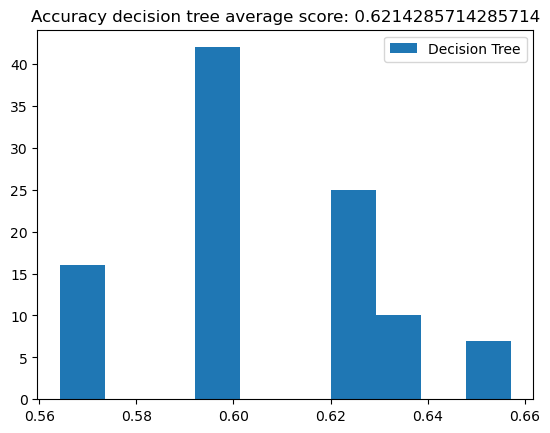

In [447]:
model_accuracies_dt_3 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_3,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_3 = DecisionTreeClassifier()
    dt_classifier_3.fit(inputs_test_3, target_test_3)
    dt_classifier_accuracy_3 = dt_classifier_3.score(inputs_train_3, target_train_3)
    model_accuracies_dt_3.append(dt_classifier_accuracy_3)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_3, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_3)));
plt.legend()
plt.show()

### K-NN <a name = "k_nn_3"></a>
[[voltar a Teste 3]](#teste_3)

In [448]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_3 = KNeighborsClassifier()
knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_3 = knn_classifier_3.score(inputs_test_3, target_test_3.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_3)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.52
Tempo que demorou: 0.013 segundos 



Tempo que demorou: 0.795 segundos 



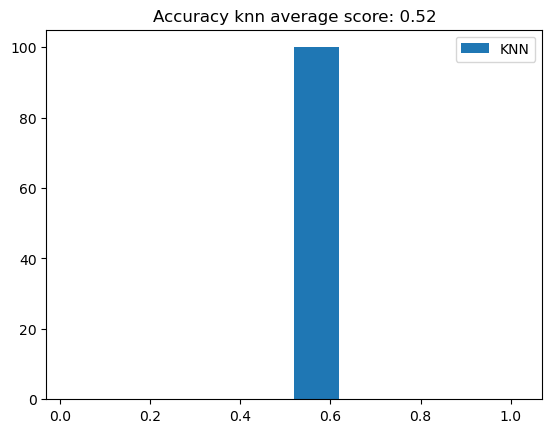

In [449]:
model_accuracies_knn_3 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_3, inputs_test_3, target_train_3, target_test_3 = train_test_split(inputs_3,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_3 = KNeighborsClassifier()
    knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel())
    knn_classifier_accuracy_3 = knn_classifier_3.score(inputs_test_3, target_test_3.values.ravel()) 
    model_accuracies_knn_3.append(knn_classifier_accuracy_3)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_3, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_3)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_3"></a>
[[voltar a Teste 3]](#teste_3)

In [450]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_3, target_train_3, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

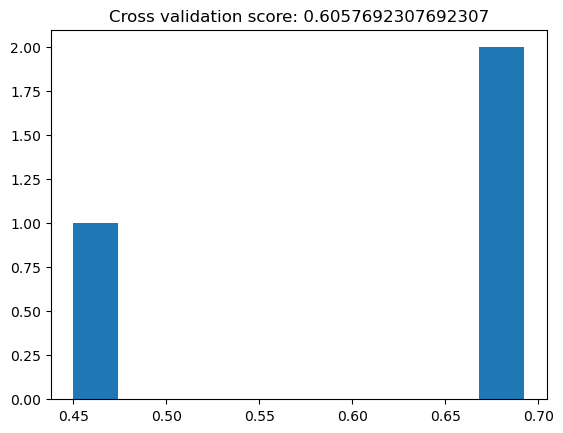

In [451]:
dt_classifier_3 = DecisionTreeClassifier()
dt3 = dt_classifier_3.fit(inputs_train_3, target_train_3)
cross(dt3)

#### K-NN

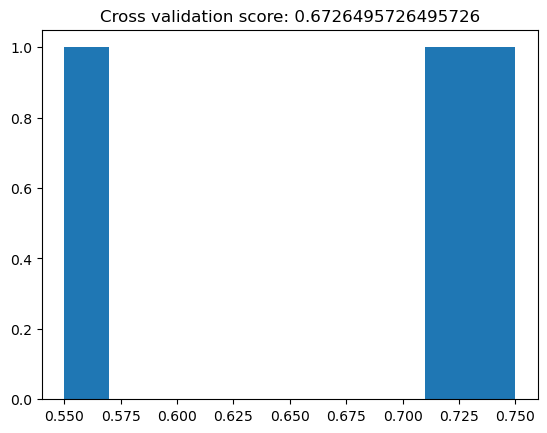

In [452]:
knn_classifier_3 = KNeighborsClassifier()
knn3 = knn_classifier_3.fit(inputs_train_3, target_train_3.values.ravel())
cross(knn3)

## Teste 4 <a name = "teste_4"></a>
   - [Configuração dos Dados](#configurar_dados_4)
   - [Decision Tree](#decision_tree_4)
   - [K-NN](#k-nn_4)
   - [Cross-Validation](#cross_validation_4)
    
[[voltar a classificação]](#classificação)

### Configuração dos Dados <a name = "configurar_dados_4"></a>
[[voltar a Teste 4]](#teste_4)

In [453]:
# Vamos remover, por exemplo, Hemoglobin e PS
columns_to_drop = ['Alcohol', 'HBsAg', 'Packs_year', 'NASH', 'AHT', 'HBcAb']
inputs_4 = inputs_3.drop(columns=columns_to_drop)

In [454]:
from sklearn.model_selection import train_test_split

(inputs_train_4,
 inputs_test_4,
 target_train_4,
 target_test_4) = train_test_split(inputs_4, target_c, test_size = 0.15, random_state = 1)

In [455]:
inputs_train_4

,Symptoms,HBeAg,HCVAb,Endemic,Smoking,Diabetes,CRI,PHT,PVT,Metastasis,...,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
54,1,0,1,0,1,0,0,1,1,0,...,523,433,397,1,1,2,6,56,27,742
5,0,0,0,0,0,0,0,1,0,0,...,122,242,396,1,1,10,1,53,22,111
89,0,0,0,0,1,0,0,1,0,0,...,51,993,474,3,1,2,1,198,108,895
95,0,0,0,0,0,0,1,0,0,0,...,17,44,124,2,1,6,0,15,7,810
16,0,0,0,0,1,1,0,1,1,0,...,63,201,235,1,2,2,3,136,95,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,0,1,0,0,0,1,0,0,1,...,102,739,587,2,5,16,1,14,5,149
137,1,0,0,0,0,0,0,0,0,0,...,29,82,141,1,1,10,3,91,31,80
72,1,0,0,0,1,0,0,1,1,1,...,80,177,1,2,5,4,1,26,15,227
140,1,0,0,0,0,0,0,0,1,0,...,58,229,302,1,5,9,2,102,49,206


In [456]:
inputs_test_4

,Symptoms,HBeAg,HCVAb,Endemic,Smoking,Diabetes,CRI,PHT,PVT,Metastasis,...,AST,GGT,ALP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
44,0,0,1,0,0,0,0,1,0,0,...,52,72,97,1,5,2,0,54,20,259
47,1,0,0,0,0,0,0,1,1,1,...,244,795,595,1,1,2,4,63,34,888
158,1,0,0,0,0,1,1,1,0,0,...,59,450,263,1,1,8,1,121,43,363
66,1,0,0,0,1,0,0,1,0,0,...,52,275,113,1,2,6,0,94,33,393
145,1,0,0,0,0,1,0,0,0,0,...,51,983,141,1,1,15,0,52,15,132
11,0,0,1,1,0,0,0,1,0,0,...,168,113,154,8,5,2,0,144,41,277
78,1,0,0,0,0,0,0,1,0,1,...,43,23,88,1,5,5,0,19,8,141
35,1,0,0,0,0,0,0,0,0,1,...,86,89,113,1,3,9,0,126,40,334
99,0,0,0,0,0,0,0,1,0,0,...,335,351,66,1,5,7,6,72,25,92
14,0,0,0,0,0,1,0,1,0,0,...,116,165,163,1,4,4,4,197,84,302


In [457]:
target_train_4

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [458]:
target_test_4

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_4"></a>
[[voltar a Teste 4]](#teste_4)

In [459]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_4 = DecisionTreeClassifier()
dt_classifier_4.fit(inputs_test_4, target_test_4)
dt_score_4 = dt_classifier_4.score(inputs_train_4, target_train_4)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_4)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5642857142857143
Tempo que demorou: 0.008 segundos 



Tempo que demorou: 1.469 segundos 



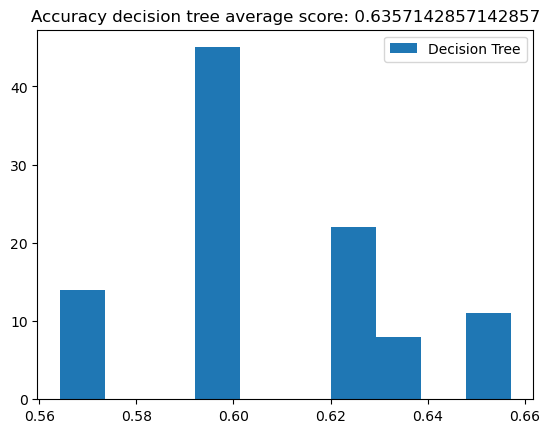

In [460]:
model_accuracies_dt_4 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_4,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_4 = DecisionTreeClassifier()
    dt_classifier_4.fit(inputs_test_4, target_test_4)
    dt_classifier_accuracy_4 = dt_classifier_4.score(inputs_train_4, target_train_4)
    model_accuracies_dt_4.append(dt_classifier_accuracy_4)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_4, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_4)));
plt.legend()
plt.show()

### K-NN <a name = "k_nn_4"></a>
[[voltar a Teste 4]](#teste_4)

In [461]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_4 = KNeighborsClassifier()
knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_4 = knn_classifier_4.score(inputs_test_4, target_test_4.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_4)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.56
Tempo que demorou: 0.024 segundos 



Tempo que demorou: 1.145 segundos 



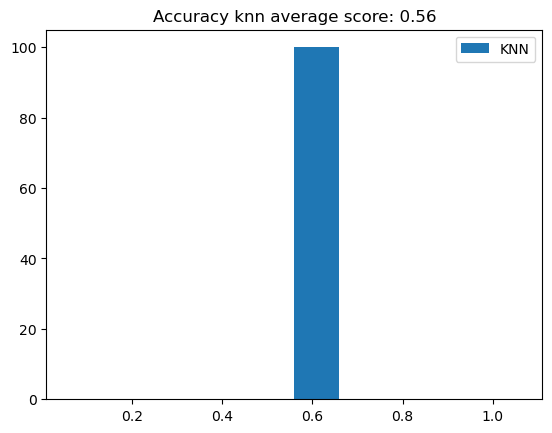

In [462]:
model_accuracies_knn_4 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_4, inputs_test_4, target_train_4, target_test_4 = train_test_split(inputs_4,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_4 = KNeighborsClassifier()
    knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel())
    knn_classifier_accuracy_4 = knn_classifier_4.score(inputs_test_4, target_test_4.values.ravel()) 
    model_accuracies_knn_4.append(knn_classifier_accuracy_4)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_4, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_4)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_4"></a>
[[voltar a Teste 4]](#teste_4)

In [463]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_4, target_train_4, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

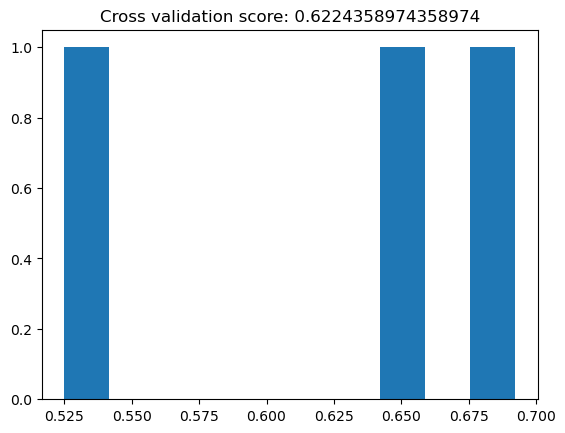

In [464]:
dt_classifier_4 = DecisionTreeClassifier()
dt4 = dt_classifier_4.fit(inputs_train_4, target_train_4)
cross(dt4)

#### K-NN

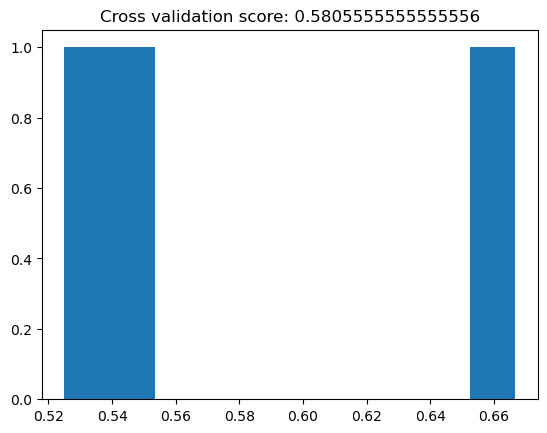

In [465]:
knn_classifier_4 = KNeighborsClassifier()
knn4 = knn_classifier_4.fit(inputs_train_4, target_train_4.values.ravel())
cross(knn4)

## Teste 5 <a name = "teste_5"></a>
   - [Configuração dos Dados](#configurar_dados_5)
   - [Decision Tree](#decision_tree_5)
   - [K-NN](#k-nn_5)
   - [Cross-Validation](#cross_validation_5)
    
[[voltar a classificação]](#classificação)

### Configuração dos Dados <a name = "configurar_dados_5"></a>
[[voltar a Teste 5]](#teste_5)

In [466]:
# Vamos remover, por exemplo, Hemoglobin e PS
columns_to_drop = ['Smoking', 'PHT', 'Sat', 'Leucocytes', 'CRI', 'Creatinine']
inputs_5 = inputs_4.drop(columns=columns_to_drop)

In [467]:
from sklearn.model_selection import train_test_split

(inputs_train_5,
 inputs_test_5,
 target_train_5,
 target_test_5) = train_test_split(inputs_5, target_c, test_size = 0.15, random_state = 1)

In [468]:
inputs_train_5

,Symptoms,HBeAg,HCVAb,Endemic,Diabetes,PVT,Metastasis,Age,Grams_day,PS,...,Albumin,Total_Bil,AST,GGT,ALP,Nodules,Major_Dim,Dir_Bil,Iron,Ferritin
54,1,0,1,0,0,1,0,51,100,4,...,3,8,523,433,397,1,2,6,56,742
5,0,0,0,0,0,0,0,75,0,3,...,3,4,122,242,396,1,10,1,53,111
89,0,0,0,0,0,0,0,61,0,3,...,2,2,51,993,474,1,2,1,198,895
95,0,0,0,0,0,0,0,78,0,3,...,4,1,17,44,124,1,6,0,15,810
16,0,0,0,0,1,1,0,72,0,4,...,2,10,63,201,235,2,2,3,136,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,0,1,0,0,0,1,82,0,3,...,3,1,102,739,587,5,16,1,14,149
137,1,0,0,0,0,0,0,78,0,0,...,4,1,29,82,141,1,10,3,91,80
72,1,0,0,0,0,1,1,82,50,1,...,3,2,80,177,1,5,4,1,26,227
140,1,0,0,0,0,1,0,43,0,0,...,4,0,58,229,302,5,9,2,102,206


In [469]:
inputs_test_5

,Symptoms,HBeAg,HCVAb,Endemic,Diabetes,PVT,Metastasis,Age,Grams_day,PS,...,Albumin,Total_Bil,AST,GGT,ALP,Nodules,Major_Dim,Dir_Bil,Iron,Ferritin
44,0,0,1,0,0,0,0,52,0,0,...,3,2,52,72,97,5,2,0,54,259
47,1,0,0,0,0,1,1,66,0,3,...,3,7,244,795,595,1,2,4,63,888
158,1,0,0,0,1,0,0,71,0,4,...,4,0,59,450,263,1,8,1,121,363
66,1,0,0,0,0,0,0,68,60,0,...,5,1,52,275,113,2,6,0,94,393
145,1,0,0,0,1,0,0,80,0,0,...,4,1,51,983,141,1,15,0,52,132
11,0,0,1,1,0,0,0,74,0,0,...,4,1,168,113,154,5,2,0,144,277
78,1,0,0,0,0,0,1,52,80,4,...,3,0,43,23,88,5,5,0,19,141
35,1,0,0,0,0,0,1,76,0,0,...,4,1,86,89,113,3,9,0,126,334
99,0,0,0,0,0,0,0,73,0,1,...,3,10,335,351,66,5,7,6,72,92
14,0,0,0,0,1,0,0,63,0,1,...,3,10,116,165,163,4,4,4,197,302


In [470]:
target_train_5

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [471]:
target_test_5

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_5"></a>
[[voltar a Teste 5]](#teste_5)

In [472]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_5 = DecisionTreeClassifier()
dt_classifier_5.fit(inputs_test_5, target_test_5)
dt_score_5 = dt_classifier_5.score(inputs_train_5, target_train_5)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_5)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.5
Tempo que demorou: 0.014 segundos 



Tempo que demorou: 0.741 segundos 



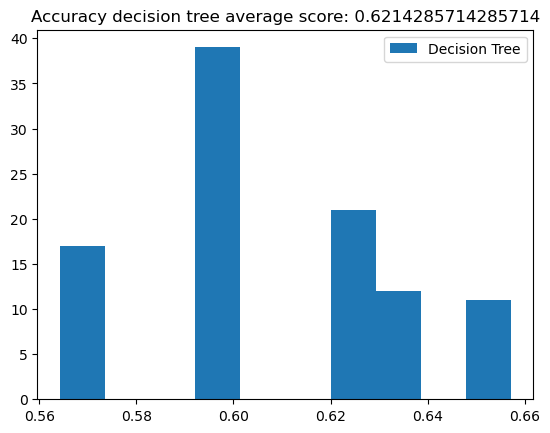

In [473]:
model_accuracies_dt_5 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_5, inputs_test_5, target_train_5, target_test_5 = train_test_split(inputs_5,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_5 = DecisionTreeClassifier()
    dt_classifier_5.fit(inputs_test_5, target_test_5)
    dt_classifier_accuracy_5 = dt_classifier_5.score(inputs_train_5, target_train_5)
    model_accuracies_dt_5.append(dt_classifier_accuracy_5)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_5, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_5)));
plt.legend()
plt.show()

### K-NN <a name = "k_nn_5"></a>
[[voltar a Teste 5]](#teste_5)

In [474]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_5 = KNeighborsClassifier()
knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_5 = knn_classifier_5.score(inputs_test_5, target_test_5.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_5)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.64
Tempo que demorou: 0.009 segundos 



Tempo que demorou: 2.710 segundos 



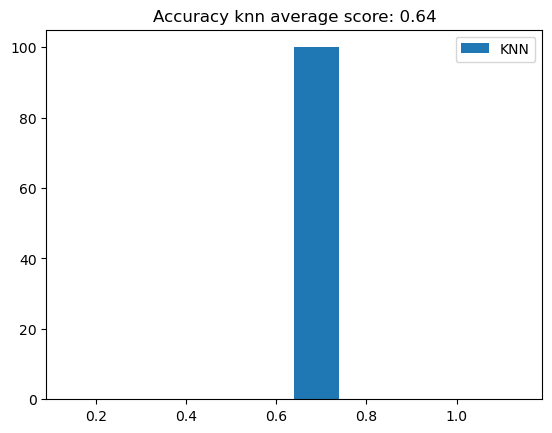

In [475]:
model_accuracies_knn_5 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_5, inputs_test_5, target_train_5, target_test_5 = train_test_split(inputs_5,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_5 = KNeighborsClassifier()
    knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel())
    knn_classifier_accuracy_5 = knn_classifier_5.score(inputs_test_5, target_test_5.values.ravel()) 
    model_accuracies_knn_5.append(knn_classifier_accuracy_5)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_5, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_5)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_5"></a>
[[voltar a Teste 5]](#teste_5)

In [476]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_5, target_train_5, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

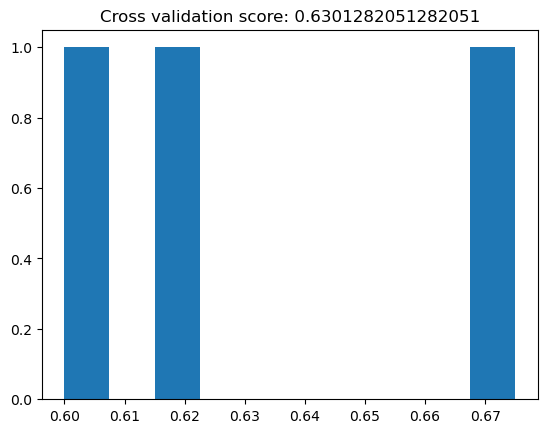

In [477]:
dt_classifier_5 = DecisionTreeClassifier()
dt5 = dt_classifier_5.fit(inputs_train_5, target_train_5)
cross(dt5)

#### K-NN

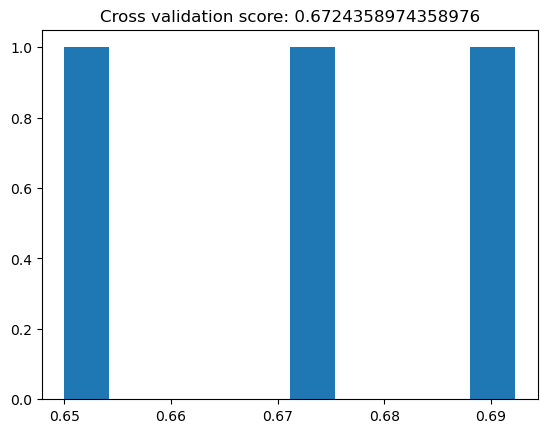

In [478]:
knn_classifier_5 = KNeighborsClassifier()
knn5 = knn_classifier_5.fit(inputs_train_5, target_train_5.values.ravel())
cross(knn5)

## Teste 6 <a name = "teste_6"></a>
   - [Configuração dos Dados](#configurar_dados_6)
   - [Decision Tree](#decision_tree_6)
   - [K-NN](#k-nn_6)
   - [Cross-Validation](#cross_validation_6)
    
[[voltar a classificação]](#classificação)

### Configuração dos Dados <a name = "configurar_dados_6"></a>
[[voltar a Teste 6]](#teste_6)

In [479]:
# Vamos retirar mais 4 variáveis, retirando assim todas as variáveis com uma importância < 0.10
columns_to_drop = ['Nodules', 'Endemic', 'HBeAg', 'Diabetes', 'Major_Dim', 'Grams_day']
inputs_6 = inputs_5.drop(columns=columns_to_drop)

In [480]:
from sklearn.model_selection import train_test_split

(inputs_train_6,
 inputs_test_6,
 target_train_6,
 target_test_6) = train_test_split(inputs_6, target_c, test_size = 0.15, random_state = 1)

In [481]:
inputs_train_6

,Symptoms,HCVAb,PVT,Metastasis,Age,PS,Encephalopathy,Ascites,INR,Hemoglobin,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Dir_Bil,Iron,Ferritin
54,1,1,1,0,51,4,2,0,1,12,216,3,8,523,433,397,6,56,742
5,0,0,0,0,75,3,2,0,2,13,85,3,4,122,242,396,1,53,111
89,0,0,0,0,61,3,0,1,1,10,38000,2,2,51,993,474,1,198,895
95,0,0,0,0,78,3,2,2,2,10,228000,4,1,17,44,124,0,15,810
16,0,0,1,0,72,4,0,2,2,12,58,2,10,63,201,235,3,136,767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,1,1,0,1,82,3,2,2,1,11,318000,3,1,102,739,587,1,14,149
137,1,0,0,0,78,0,0,2,1,13,136000,4,1,29,82,141,3,91,80
72,1,0,1,1,82,1,2,0,2,14,109,3,2,80,177,1,1,26,227
140,1,0,1,0,43,0,2,2,1,12,130,4,0,58,229,302,2,102,206


In [482]:
inputs_test_6

,Symptoms,HCVAb,PVT,Metastasis,Age,PS,Encephalopathy,Ascites,INR,Hemoglobin,Platelets,Albumin,Total_Bil,AST,GGT,ALP,Dir_Bil,Iron,Ferritin
44,0,1,0,0,52,0,2,2,2,16,88,3,2,52,72,97,0,54,259
47,1,0,1,1,66,3,2,0,2,14,277000,3,7,244,795,595,4,63,888
158,1,0,0,0,71,4,2,2,1,8,209000,4,0,59,450,263,1,121,363
66,1,0,0,0,68,0,2,2,1,16,91000,5,1,52,275,113,0,94,393
145,1,0,0,0,80,0,2,2,1,9,157000,4,1,51,983,141,0,52,132
11,0,1,0,0,74,0,2,2,1,16,61,4,1,168,113,154,0,144,277
78,1,0,0,1,52,4,2,2,1,10,561,3,0,43,23,88,0,19,141
35,1,0,0,1,76,0,2,2,1,15,187,4,1,86,89,113,0,126,334
99,0,0,0,0,73,1,2,0,2,13,133000,3,10,335,351,66,6,72,92
14,0,0,0,0,63,1,0,0,1,14,128,3,10,116,165,163,4,197,302


In [483]:
target_train_6

54     0
5      0
89     1
95     0
16     0
      ..
133    0
137    1
72     1
140    0
37     0
Name: Class, Length: 140, dtype: int64

In [484]:
target_test_6

44     1
47     0
158    1
66     1
145    1
11     1
78     1
35     1
99     1
14     1
119    1
103    0
94     1
19     0
124    0
122    0
69     0
151    1
88     0
84     1
107    0
29     1
39     1
157    1
110    1
Name: Class, dtype: int64

### Decision Tree <a name = "decision_tree_6"></a>
[[voltar a Teste 6]](#teste_6)

In [485]:
from sklearn.tree import DecisionTreeClassifier

tempo_i = time.time()

dt_classifier_6 = DecisionTreeClassifier()
dt_classifier_6.fit(inputs_test_6, target_test_6)
dt_score_6 = dt_classifier_6.score(inputs_train_6, target_train_6)

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score desicion tree:", dt_score_6)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score desicion tree: 0.55
Tempo que demorou: 0.012 segundos 



Tempo que demorou: 1.312 segundos 



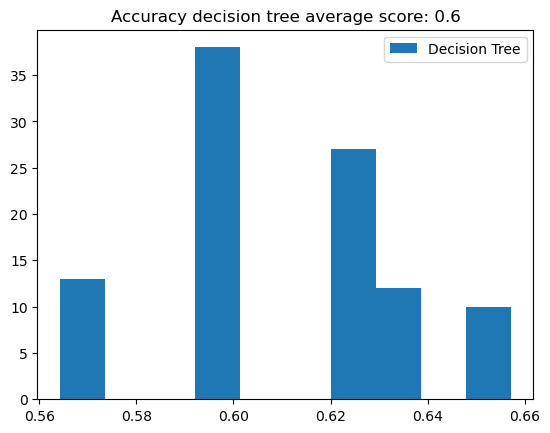

In [486]:
model_accuracies_dt_6 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_6, inputs_test_6, target_train_6, target_test_6 = train_test_split(inputs_6,target_c,test_size=0.15,random_state=42)
    
    dt_classifier_6 = DecisionTreeClassifier()
    dt_classifier_6.fit(inputs_test_6, target_test_6)
    dt_classifier_accuracy_6 = dt_classifier_6.score(inputs_train_6, target_train_6)
    model_accuracies_dt_6.append(dt_classifier_accuracy_6)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_dt_6, label ='Decision Tree')
plt.title('Accuracy decision tree average score: {}'.format(np.average(dt_classifier_accuracy_6)));
plt.legend()
plt.show()

### K-NN <a name = "k_nn_6"></a>
[[voltar a Teste 6]](#teste_6)

In [487]:
from sklearn.neighbors import KNeighborsClassifier

tempo_i = time.time()

knn_classifier_6 = KNeighborsClassifier()
knn_classifier_6.fit(inputs_train_6, target_train_6.values.ravel()) #By using values.ravel(), you ensure that the target variable is converted to a 1-dimensional array. 
knn_score_6 = knn_classifier_6.score(inputs_test_6, target_test_6.values.ravel()) 

tempo_f = time.time()
duracao = (tempo_f - tempo_i)

print("Score knn:", knn_score_6)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))

Score knn: 0.64
Tempo que demorou: 0.009 segundos 



Tempo que demorou: 3.298 segundos 



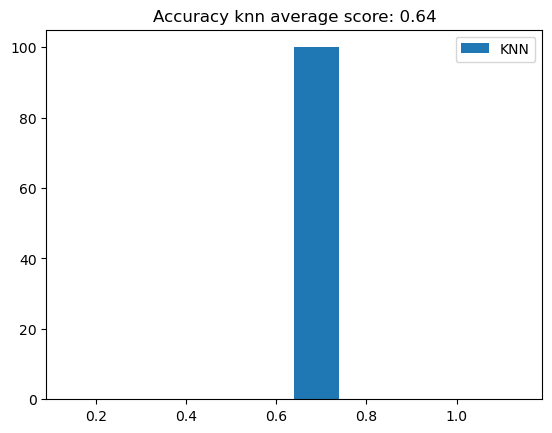

In [488]:
model_accuracies_knn_6 = []

tempo_i = time.time()

for repetition in range(100):
    inputs_train_6, inputs_test_6, target_train_6, target_test_6 = train_test_split(inputs_6,target_c,test_size=0.15,random_state=42)
    
    knn_classifier_6 = KNeighborsClassifier()
    knn_classifier_6.fit(inputs_train_6, target_train_6.values.ravel())
    knn_classifier_accuracy_6 = knn_classifier_6.score(inputs_test_6, target_test_6.values.ravel()) 
    model_accuracies_knn_6.append(knn_classifier_accuracy_6)
    
tempo_f = time.time()
duracao = (tempo_f - tempo_i)
print("Tempo que demorou: {:.3f} segundos \n".format(duracao))
    
plt.hist(model_accuracies_knn_6, label='KNN')
plt.title('Accuracy knn average score: {}'.format(np.average(knn_classifier_accuracy_6)));
plt.legend()
plt.show()

### Cross-Validation <a name = "cross_validation_6"></a>
[[voltar a Teste 6]](#teste_6)

In [489]:
def cross(classifier):
    X_train, X_test, y_train, y_test = train_test_split(inputs_train_6, target_train_6, test_size=0.15)
    classifier.fit(X_train, np.array(y_train).ravel())
    cv_scores = cross_val_score(classifier, X_train, np.array(y_train).ravel(), cv=3)
    plt.hist(cv_scores)
    plt.title('Cross validation score: {}'.format(np.mean(cv_scores)))

#### Decision Tree

In [490]:
df.to_csv('hcc_dataset_filled.csv', index=False)
df_filled = pd.read_csv('hcc_dataset_filled.csv')

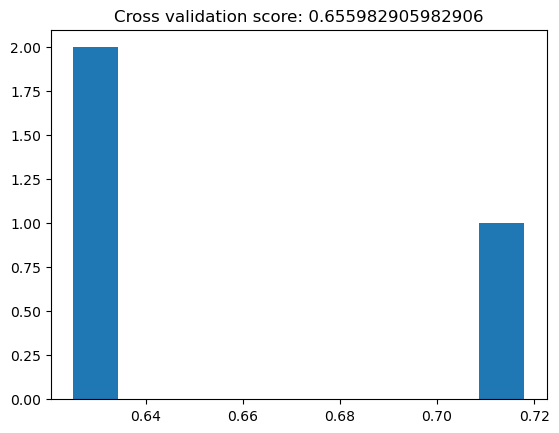

In [491]:
dt_classifier_6 = DecisionTreeClassifier()
dt6 = dt_classifier_6.fit(inputs_train_6, target_train_6)
cross(dt6)

#### K-NN

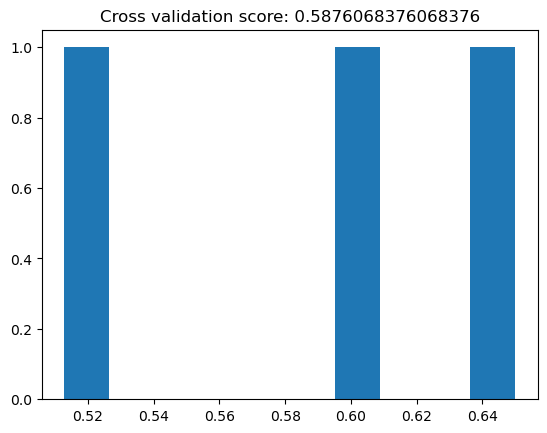

In [492]:
knn_classifier_6 = KNeighborsClassifier()
knn6 = knn_classifier_6.fit(inputs_train_6, target_train_6.values.ravel())
cross(knn6)

## Comparar Resultados <a name = "comparar_resultados"></a>

   - [Comparação dos diversos gráficos de 'Decision Trees'](#comparação_decision_trees)
   - [Comparação dos diversos gráficos de 'K-NN'](#comparação_K_NN)

[[voltar ao índice]](#indice)

### Comparação dos diversos gráficos de 'Decision Trees' <a name = "comparação_decision_trees"></a>

[[voltar a Comparar Resultados]](#comparar_resultados)

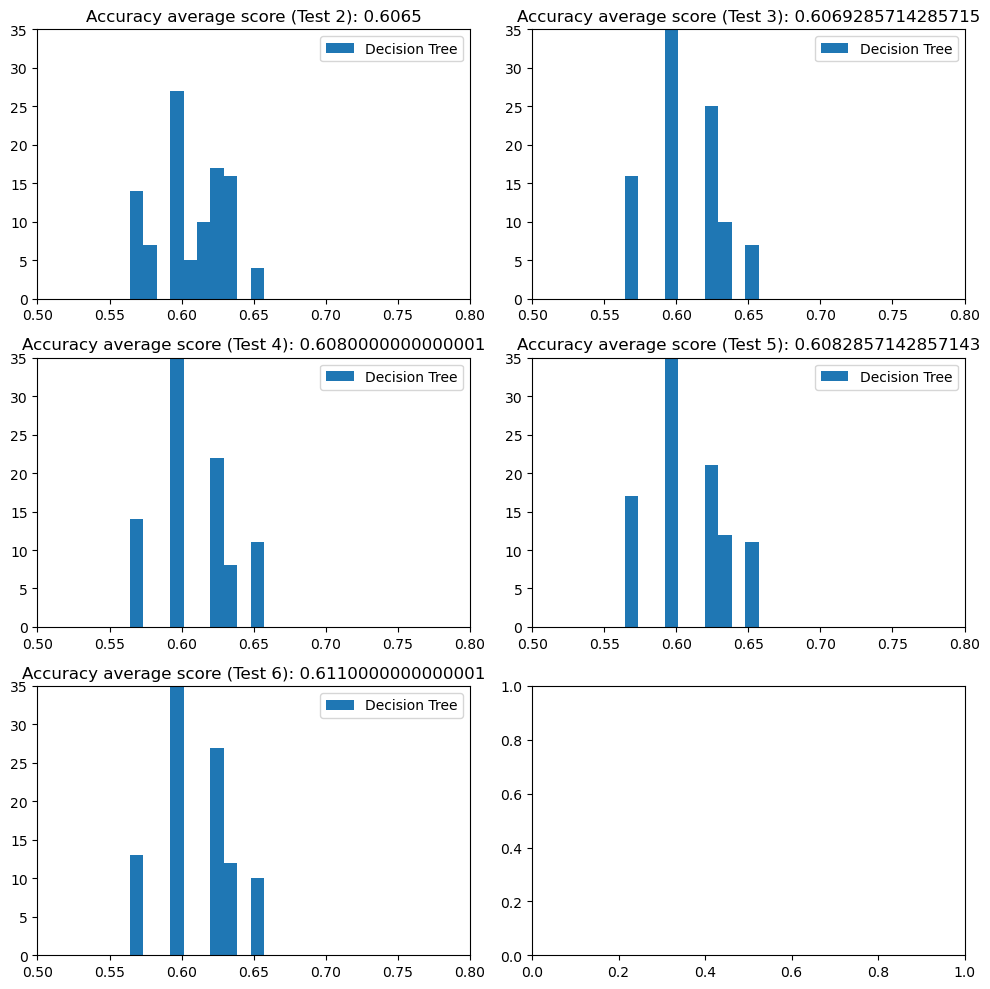

In [493]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies_dt = [model_accuracies_dt_2, model_accuracies_dt_3, model_accuracies_dt_4, model_accuracies_dt_5, model_accuracies_dt_6]
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_dt):
    axs[i // 2, i % 2].set_xlim([0.50, 0.80])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 35])
    axs[i // 2, i % 2].hist(model_accuracy, label='Decision Tree')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

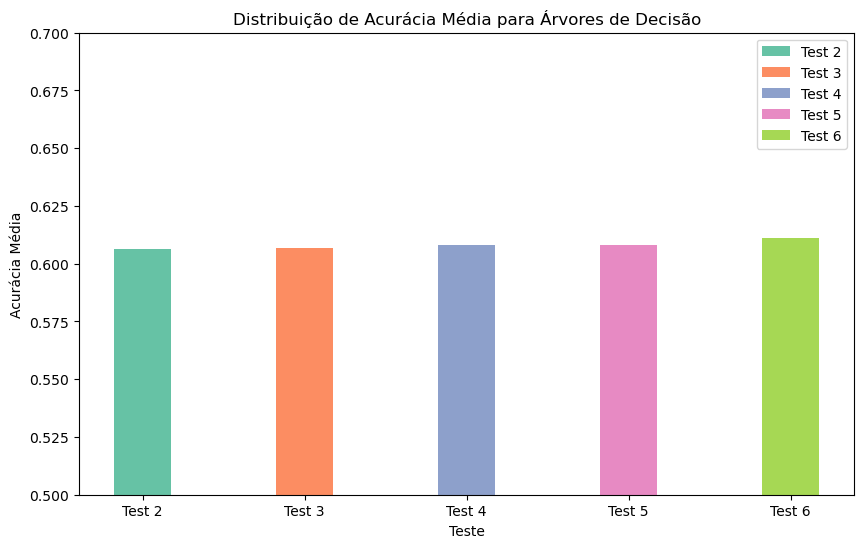

In [494]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Definir a paleta de cores Set2
palette = sns.color_palette("Set2")

model_accuracies_dt = [model_accuracies_dt_2, model_accuracies_dt_3, model_accuracies_dt_4, model_accuracies_dt_5, model_accuracies_dt_6]

# Calcular a média de cada conjunto de métricas de precisão
mean_accuracies = [np.mean(accuracy) for accuracy in model_accuracies_dt]

# Definir os rótulos dos grupos (Test 2, Test 3, etc.)
labels = ['Test {}'.format(i) for i in range(2, 7)]

# Definir as posições dos grupos no eixo x
x = np.arange(len(labels))

# Largura das barras
width = 0.35

# Criar o subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para as médias de precisão de cada teste com cores da paleta
for i, mean_accuracy in enumerate(mean_accuracies):
    ax.bar(x[i], mean_accuracy, width, label=labels[i], color=palette[i])

# Definir os rótulos do eixo x, título e legenda
ax.set_xlabel('Teste')
ax.set_ylabel('Acurácia Média')
ax.set_title('Distribuição de Acurácia Média para Árvores de Decisão')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.50, 0.7)  # Definir limite do eixo y
ax.legend()

plt.show()



### Comparação dos diversos gráficos de 'K-NN' <a name = "comparação_K_NN"></a>

[[voltar a Comparar Resultados]](#comparar_resultados)

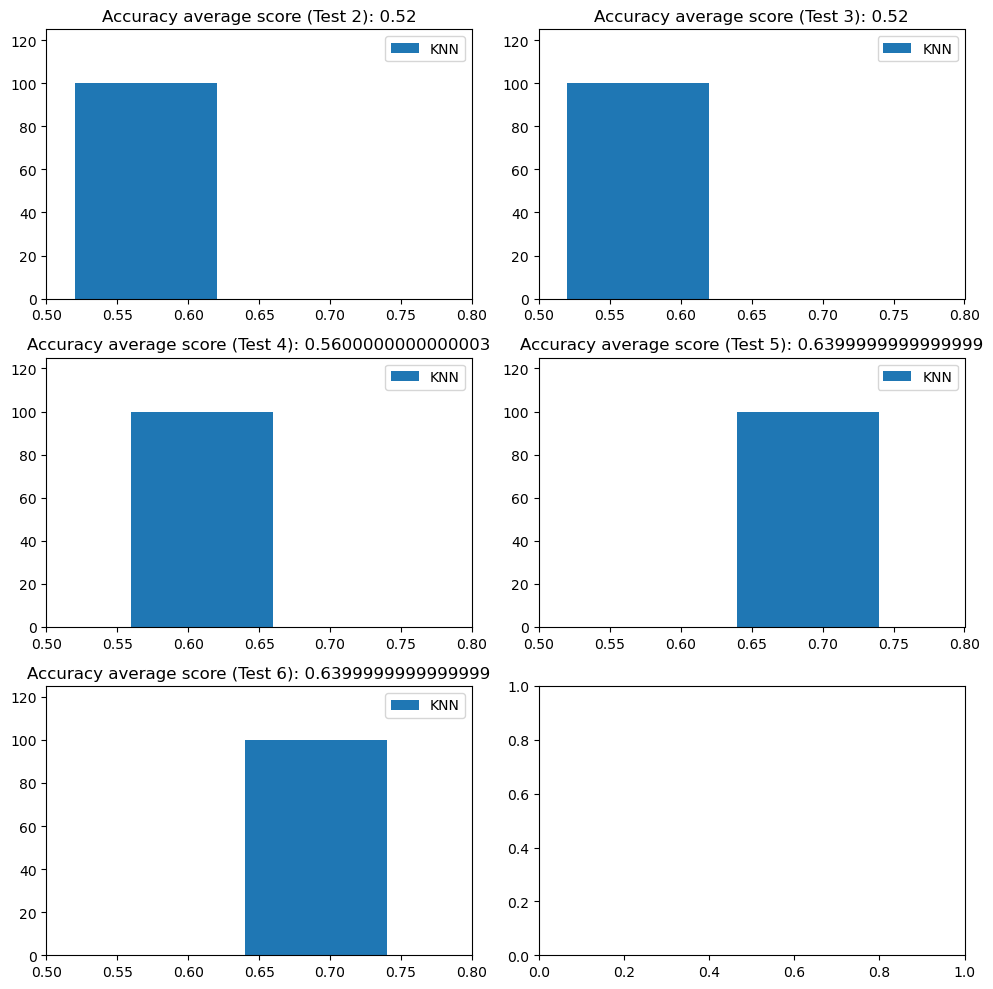

In [495]:
import matplotlib.pyplot as plt
import numpy as np

model_accuracies_knn = [model_accuracies_knn_2, model_accuracies_knn_3, model_accuracies_knn_4, model_accuracies_knn_5, model_accuracies_knn_6]
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Ajustar o tamanho da figura

# Plotar cada um dos gráficos em um subplot diferente
for i, model_accuracy in enumerate(model_accuracies_knn):
    axs[i // 2, i % 2].set_xlim([0.5, 0.80])  # Definir limites do eixo x
    axs[i // 2, i % 2].set_ylim([0, 125])
    axs[i // 2, i % 2].hist(model_accuracy, label='KNN')
    axs[i // 2, i % 2].set_title('Accuracy average score (Test {}): {}'.format(i+2, np.average(model_accuracy)))
    axs[i // 2, i % 2].legend()

plt.tight_layout()
plt.show()

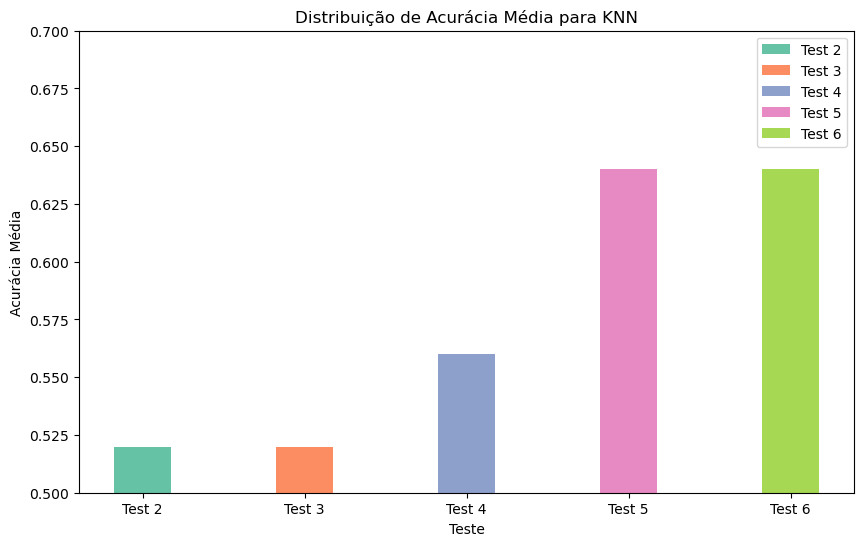

In [496]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Definir a paleta de cores Set2
palette = sns.color_palette("Set2")

model_accuracies_dt = [model_accuracies_knn_2, model_accuracies_knn_3, model_accuracies_knn_4, model_accuracies_knn_5, model_accuracies_knn_6]

# Calcular a média de cada conjunto de métricas de precisão
mean_accuracies = [np.mean(accuracy) for accuracy in model_accuracies_knn]

# Definir os rótulos dos grupos (Test 2, Test 3, etc.)
labels = ['Test {}'.format(i) for i in range(2, 7)]

# Definir as posições dos grupos no eixo x
x = np.arange(len(labels))

# Largura das barras
width = 0.35

# Criar o subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar as barras para as médias de precisão de cada teste com cores da paleta
for i, mean_accuracy in enumerate(mean_accuracies):
    ax.bar(x[i], mean_accuracy, width, label=labels[i], color=palette[i])

# Definir os rótulos do eixo x, título e legenda
ax.set_xlabel('Teste')
ax.set_ylabel('Acurácia Média')
ax.set_title('Distribuição de Acurácia Média para KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0.50, 0.7)  # Definir limite do eixo y
ax.legend()

plt.show()

--------------------------------------------------------------------------------------------------------------------------

## Parameter Tuning <a name = "parameter_tuning"></a>

   - [Decision Tree](#decision_tree_pt)
   - [K-NN](#knn_pt)

[[voltar ao índice]](#indice)

Temos a melhor precisão até o momento, no entanto vamos ajustar os parâmetros para alcançar uma precisão ainda melhor.

### Decision Tree <a name = "decision_tree_pt"></a>
Utilizaremos o teste 2, pois tem a melhor precisão na decision tree.

[[voltar a Parameter Tunning]](#parameter_tuning)

**Grid Search:**

In [497]:
parameters_dt = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [498]:
classifier_dt = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(classifier_dt, parameters_dt, cv=5)
grid_search_dt.fit(inputs_2, np.array(target_c).ravel())
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
test_score_dt = best_model_dt.score(inputs_test_2, np.array(target_test_2).ravel())
cv_results_dt = grid_search_dt.cv_results_
mean_scores_dt = cv_results_dt['mean_test_score']
std_scores_dt = cv_results_dt['std_test_score']

In [499]:
print("Decision Tree - Best Hyperparameters:", best_params_dt)
print("Decision Tree - Test Score:", test_score_dt)

Decision Tree - Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Decision Tree - Test Score: 0.96


Agora vamos visualizar o grid search para ver como os parâmetros interagem.

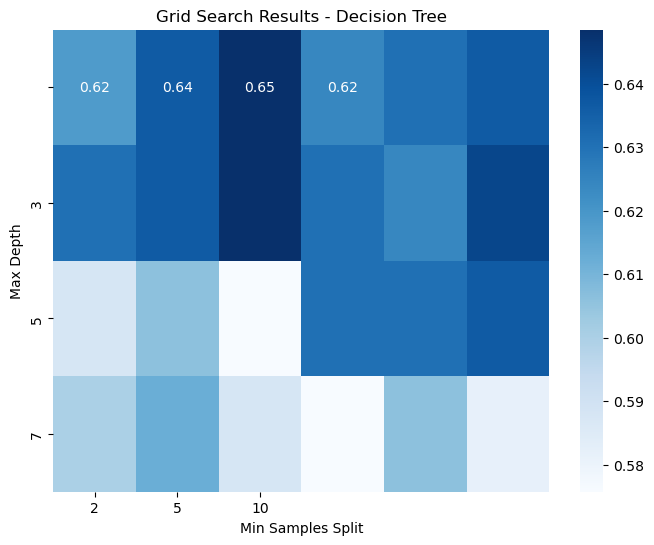

In [500]:
grid_visualization_dt = grid_search_dt.cv_results_['mean_test_score']
param_grid_shape_dt = [len(v) for v in grid_search_dt.param_grid.values()]
grid_visualization_dt = grid_visualization_dt.reshape(param_grid_shape_dt[0], -1)

plt.figure(figsize=(8, 6))
sb.heatmap(grid_visualization_dt, cmap='Blues', annot=True)
plt.xticks(np.arange(param_grid_shape_dt[1]) + 0.5, grid_search_dt.param_grid['min_samples_split'])
plt.yticks(np.arange(param_grid_shape_dt[0]) + 0.5, grid_search_dt.param_grid['max_depth'])
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.title('Grid Search Results - Decision Tree')
plt.show()

### K-NN <a name = "knn_pt"></a>
Vamos utilizar o teste 5 para o K-NN.

[[voltar a Parameter Tunning]](#parameter_tuning)

**Grid Search:**

In [501]:
parameters_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [502]:
classifier_knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(classifier_knn, parameters_knn, cv=5)
grid_search_knn.fit(inputs_5, np.array(target_c).ravel())
best_params_knn = grid_search_knn.best_params_
best_model_knn = grid_search_knn.best_estimator_
test_score_knn = best_model_knn.score(inputs_test_5, np.array(target_test_5).ravel())
cv_results_knn = grid_search_knn.cv_results_
mean_scores_knn = cv_results_knn['mean_test_score']
std_scores_knn = cv_results_knn['std_test_score']

In [503]:
print("K-Nearest Neighbors - Best Hyperparameters:", best_params_knn)
print("K-Nearest Neighbors - Test Score:", test_score_knn)

K-Nearest Neighbors - Best Hyperparameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors - Test Score: 0.72


Agora vamos visualizar o grid search para ver como os parâmetros interagem.

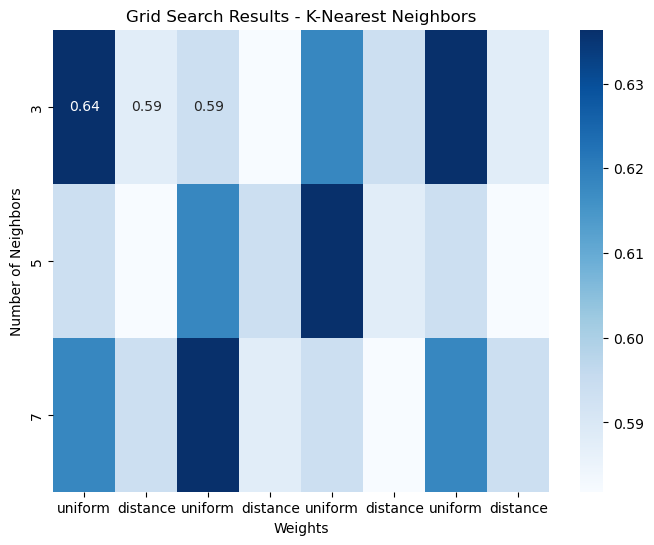

In [504]:

grid_visualization_knn = grid_search_knn.cv_results_['mean_test_score']
param_grid_shape_knn = [len(v) for v in grid_search_knn.param_grid.values()]
grid_visualization_knn = grid_visualization_knn.reshape(param_grid_shape_knn[0], -1)

plt.figure(figsize=(8, 6))
sb.heatmap(grid_visualization_knn, cmap='Blues', annot=True)
plt.xticks(np.arange(param_grid_shape_knn[1] * param_grid_shape_knn[2]) + 0.5, grid_search_knn.param_grid['weights'] * param_grid_shape_knn[2])
plt.yticks(np.arange(param_grid_shape_knn[0]) + 0.5, grid_search_knn.param_grid['n_neighbors'])
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.title('Grid Search Results - K-Nearest Neighbors')
plt.show()


------------------------------------------------------------------------------------------------

## Clustering <a name = "clustering"></a>

O clustering, ou agrupamento, é uma técnica de aprendizado de máquina não supervisionado usada para agrupar dados não rotulados em grupos ou clusters de modo que os itens dentro de um cluster sejam mais semelhantes entre si do que aos itens de outros clusters. O objetivo principal do clustering é descobrir a estrutura subjacente dos dados e revelar padrões ocultos.

Análise de Dados Médicos:
Diagnóstico: Agrupar pacientes com sintomas ou características clínicas semelhantes para diagnósticos mais precisos.
Tratamento: Identificar subgrupos de pacientes que podem responder de maneira similar a um tratamento específico.

Exemplos de Algoritmos de Clustering:
K-Means: Agrupa dados em K clusters com centróides, minimizando a soma das distâncias quadradas entre os pontos e os centróides.

[[voltar ao índice]](#indice)

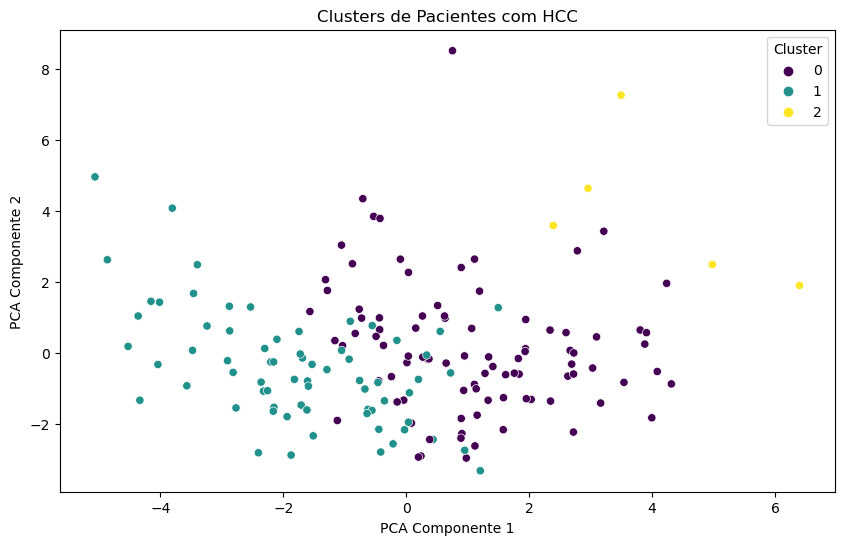

In [505]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Carregar o dataset
df = pd.read_csv("hcc_dataset_filled.csv")

# Remover a coluna alvo 'Class' se presente
df_clustering = df.drop(columns=['Class'])

# Preencher valores faltantes com a média da coluna
df_clustering.fillna(df_clustering.mean(), inplace=True)

# Escalonar os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Aplicar K-means com um número arbitrário de clusters, por exemplo, 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Adicionar as etiquetas de cluster ao dataframe original
df['Cluster'] = clusters

# Reduzir a dimensionalidade dos dados para 2D usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
# Criar um dataframe com os componentes principais e os clusters
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de Pacientes com HCC')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()

### Análise estatística das características por cluster

In [506]:
cluster_stats = df_pca.groupby('Cluster').describe()

In [507]:
cluster_stats

PCA1                                                              \
        count      mean       std       min       25%       50%       75%   
Cluster                                                                     
0        91.0  1.095488  1.498624 -1.567176 -0.013768  0.948228  1.993221   
1        69.0 -1.737898  1.570464 -5.063357 -2.816469 -1.723789 -0.552668   
2         5.0  4.045102  1.630433  2.392114  2.958154  3.495436  4.980487   

                   PCA2                                                    \
              max count      mean       std       min       25%       50%   
Cluster                                                                     
0        4.313665  91.0  0.118544  1.852043 -2.969151 -1.037549 -0.114982   
1        1.497441  69.0 -0.444778  1.580353 -3.326050 -1.553865 -0.566294   
2        6.399320   5.0  3.980438  2.118771  1.900787  2.493720  3.593699   

                             
              75%       max  
Cluster                      
0        0.978837  8.524305  
1        0.381429  4.965011  
2        4.641999  7.271982

### Visualização das características por cluster

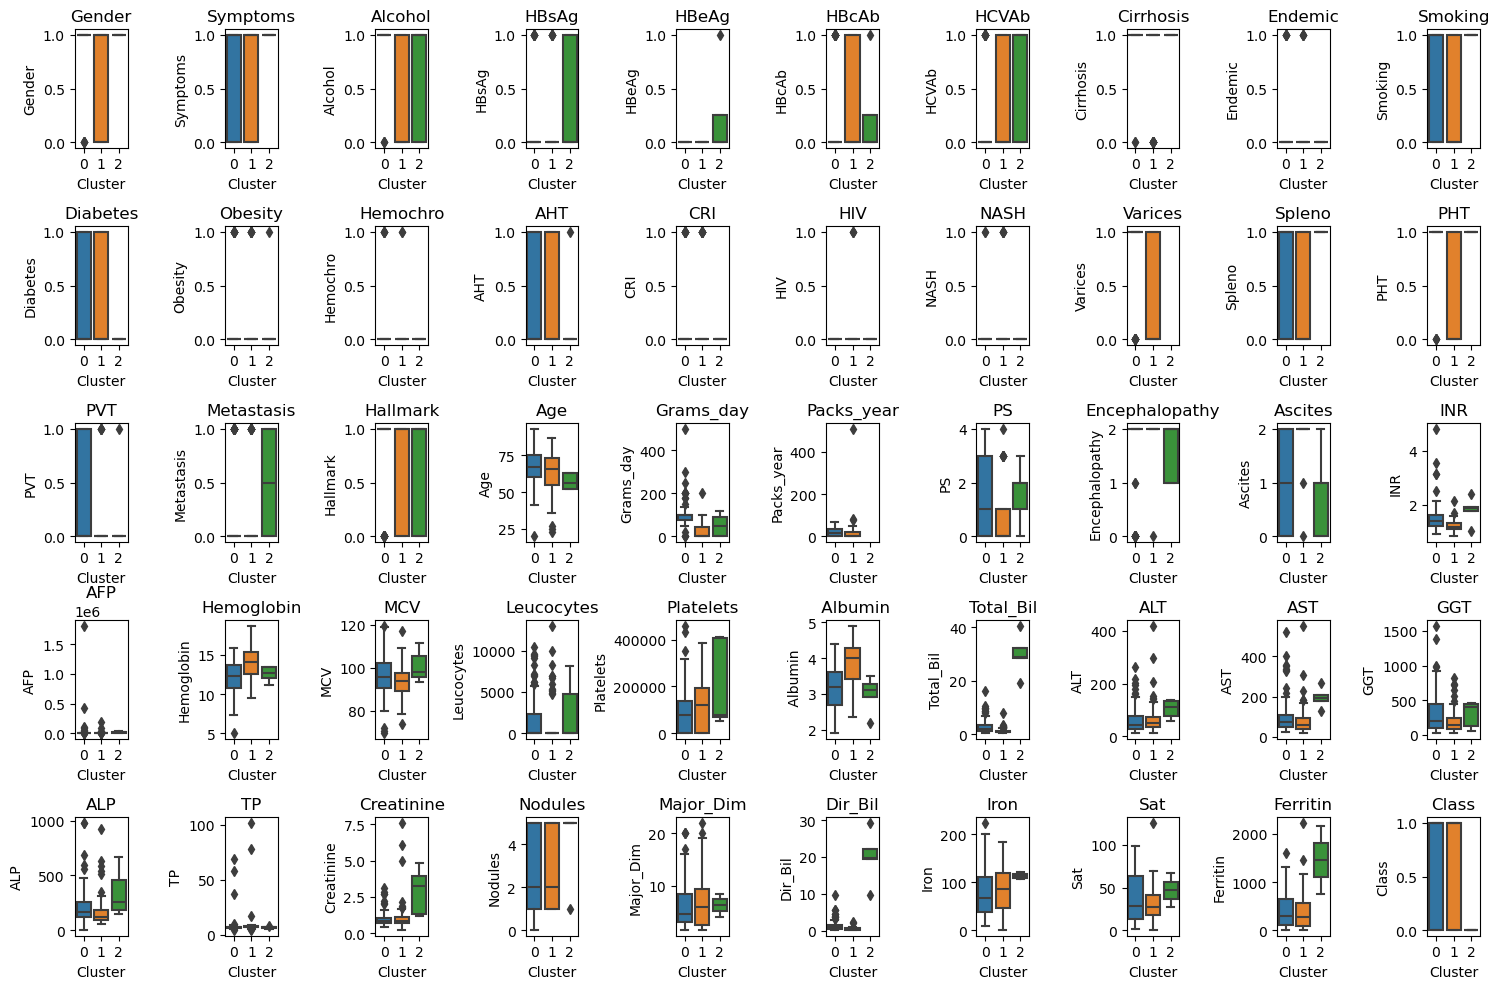

In [508]:

plt.figure(figsize=(15, 10))  # Ajuste o tamanho da figura conforme necessário
for i, col in enumerate(df.columns[:-1]):  # Ignorando a coluna de 'Cluster'
    plt.subplot(5, 10, i+1)  # Ajuste o número de subplots conforme necessário
    sb.boxplot(x='Cluster', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

### Identificação das características mais importantes

In [509]:
from sklearn.feature_selection import f_classif

# Calcular importância das características usando ANOVA
f_scores, p_values = f_classif(df.drop('Cluster', axis=1), df['Cluster'])
feature_importance = pd.DataFrame({'Feature': df.columns[:-1], 'F-Score': f_scores, 'P-Value': p_values})
feature_importance = feature_importance.sort_values(by='F-Score', ascending=False)

ValueError: Input X contains NaN.

In [ ]:
feature_importance

,Feature,F-Score,P-Value
19,PHT,66.456462,8.423993e-22
36,Total_Bil,44.990204,2.884081e-16
37,ALT,33.900421,5.026149e-13
2,Alcohol,33.466009,6.831040e-13
28,Ascites,27.953782,3.720997e-11
45,Dir_Bil,27.065123,7.223654e-11
27,Encephalopathy,26.644968,9.903625e-11
38,AST,25.975369,1.641720e-10
18,Spleno,21.519732,5.150886e-09
24,Grams_day,18.544718,5.595135e-08


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, clusters)
print("Coeficiente de Silhouette:", silhouette_avg)

Coeficiente de Silhouette: 0.04205193711638206


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_filled['Class'], clusters)
print("Precisão:", accuracy)


Precisão: 0.4909090909090909


In [ ]:
from sklearn.metrics import adjusted_rand_score

rand_index = adjusted_rand_score(df_filled['Class'], clusters)
print("Índice de Rand Ajustado:", rand_index)

Índice de Rand Ajustado: 0.026393073008656797


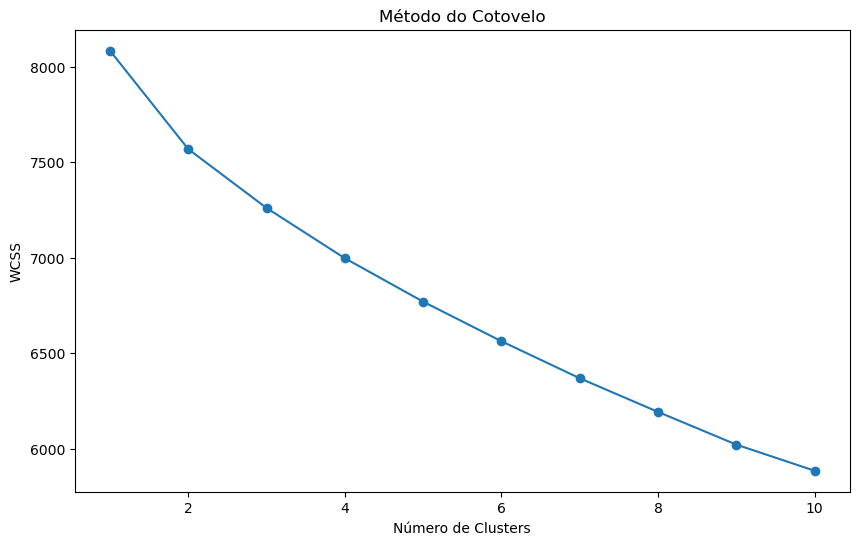

In [ ]:
#Método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
optimal_clusters = 2 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Calcular o coeficiente de Silhouette para o K-Means com o número ideal de clusters
silhouette_avg_kmeans = silhouette_score(df_scaled, clusters)
print("Coeficiente de Silhouette para K-Means com o número ideal de clusters:", silhouette_avg_kmeans)

Coeficiente de Silhouette para K-Means com o número ideal de clusters: 0.060467310516996824


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_filled['Class'], clusters)
print("Precisão:", accuracy)

Precisão: 0.6060606060606061


In [ ]:
from sklearn.metrics import adjusted_rand_score

rand_index = adjusted_rand_score(df_filled['Class'], clusters)
print("Índice de Rand Ajustado:", rand_index)

Índice de Rand Ajustado: 0.03946392683267596


In [ ]:
df_filled['Cluster'] = clusters

In [ ]:
df_filled

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,Cluster
0,1,0,1,0,0,0,0,1,0,1,...,7,1,1,4,0,173,78,680,1,0
1,0,0,0,0,0,0,1,1,0,0,...,8,1,1,2,0,187,68,542,1,1
2,1,0,1,1,0,1,0,1,0,1,...,7,2,5,13,0,28,6,16,1,0
3,1,1,1,0,0,0,0,1,0,1,...,8,1,2,16,0,72,26,385,0,1
4,1,1,1,1,0,1,0,1,0,1,...,7,2,1,9,0,59,15,22,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0,0,1,0,0,0,1,1,0,1,...,8,1,5,3,0,101,49,604,1,1
161,0,1,0,0,0,0,1,1,0,0,...,7,1,1,2,2,83,26,194,0,1
162,1,0,1,0,0,0,0,1,0,1,...,8,1,5,19,20,24,10,473,1,1
163,1,0,1,1,0,1,1,1,1,1,...,8,1,5,18,1,53,22,388,0,1


In [ ]:
# Estatísticas descritivas para cada cluster
cluster_0 = df_filled[df_filled['Cluster'] == 0]
cluster_1 = df_filled[df_filled['Cluster'] == 1]

In [ ]:
print("Estatísticas descritivas para o Cluster 0:")
cluster_0.describe()

Estatísticas descritivas para o Cluster 0:


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,Cluster
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.00000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.0
mean,0.951220,0.695122,0.951220,0.085366,0.012195,0.170732,0.182927,0.987805,0.048780,0.451220,...,8.47561,1.243902,2.768293,5.634146,2.573171,91.256098,37.878049,414.865854,0.512195,0.0
std,0.216734,0.463189,0.216734,0.281145,0.110432,0.378590,0.388986,0.110432,0.216734,0.500677,...,9.45976,0.762727,1.834503,4.448643,5.038201,54.649232,28.982068,375.020617,0.502927,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.00000,0.000000,0.000000,2.000000,0.000000,9.000000,2.000000,14.000000,0.000000,0.0
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,6.00000,1.000000,1.000000,2.000000,0.250000,42.000000,17.000000,146.750000,0.000000,0.0
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,7.00000,1.000000,2.000000,4.000000,1.000000,89.000000,28.500000,310.500000,1.000000,0.0
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,7.00000,1.000000,5.000000,7.000000,2.000000,127.750000,56.000000,573.250000,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,69.00000,5.000000,5.000000,20.000000,29.000000,224.000000,108.000000,2165.000000,1.000000,0.0


In [ ]:
print("\nEstatísticas descritivas para o Cluster 1:")
cluster_1.describe()


Estatísticas descritivas para o Cluster 1:


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,Cluster
count,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0
mean,0.662651,0.638554,0.530120,0.108434,0.0,0.289157,0.289157,0.819277,0.072289,0.313253,...,9.397590,1.240964,2.674699,7.228916,0.903614,76.807229,31.578313,458.036145,0.722892,1.0
std,0.475679,0.483340,0.502126,0.312818,0.0,0.456127,0.456127,0.387128,0.260540,0.466636,...,13.123187,1.077377,1.760740,5.446694,2.303838,46.034308,21.781129,381.314941,0.450291,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,...,7.000000,1.000000,1.000000,2.500000,0.000000,44.000000,16.000000,172.000000,0.000000,1.0
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,...,7.000000,1.000000,2.000000,6.000000,0.000000,72.000000,27.000000,363.000000,1.000000,1.0
75%,1.000000,1.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000,1.000000,...,8.000000,1.000000,5.000000,9.500000,1.000000,103.000000,47.500000,659.000000,1.000000,1.0
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,102.000000,8.000000,5.000000,22.000000,20.000000,187.000000,126.000000,2230.000000,1.000000,1.0


In [ ]:
(df_filled['Cluster'] == 0).sum()

82

In [ ]:
(df_filled['Cluster'] == 1).sum()

83

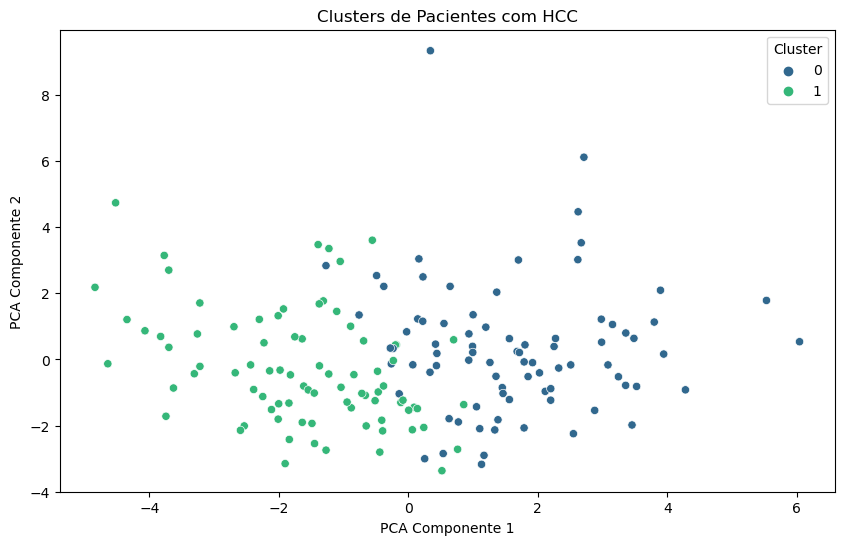

In [ ]:
# Criar um dataframe com os componentes principais e os clusters
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualizar os clusters
plt.figure(figsize=(10, 6))
sb.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis')
plt.title('Clusters de Pacientes com HCC')
plt.xlabel('PCA Componente 1')
plt.ylabel('PCA Componente 2')
plt.show()

## Equilibrio de classes através da técnica SMOTE (Synthetic Minority Over-sampling Technique) <a name = "técnica_SMOTE"></a>

O SMOTE é uma técnica usada para equilibrar conjuntos de dados desequilibrados, criando novos exemplos sintéticos da classe minoritária para melhorar a performance dos modelos de aprendizado de máquina.

[[voltar ao índice]](#indice)

In [ ]:
df_filled = pd.read_csv("hcc_dataset_filled.csv")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df_filled.drop(["Class"], axis=1)
y = df_filled.Class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Número de transações do conjunto de dados X_train: ", X_train.shape)
print("Número de transações do conjunto de dados y_train: ", y_train.shape)
print("Número de transações do conjunto de dados X_test: ", X_test.shape)
print("Número de transações do conjunto de dados y_test: ", y_test.shape)


Número de transações do conjunto de dados X_train:  (132, 49)
Número de transações do conjunto de dados y_train:  (132,)
Número de transações do conjunto de dados X_test:  (33, 49)
Número de transações do conjunto de dados y_test:  (33,)


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

print("Antes da sobreamostragem, contagens do label '1': {}".format(sum(y_train==1)))
print("Antes da sobreamostragem, contagens do label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())  # Corrigido para fit_resample

print('Após a sobreamostragem, a forma do train_x: {}'.format(X_train_res.shape))
print('Após a sobreamostragem, a forma do train_y: {} \n'.format(y_train_res.shape))

print("Após a sobreamostragem, contagens do label '1': {}".format(sum(y_train_res==1)))
print("Após a sobreamostragem, contagens do label '0': {}".format(sum(y_train_res==0)))


Antes da sobreamostragem, contagens do label '1': 83
Antes da sobreamostragem, contagens do label '0': 49 

Após a sobreamostragem, a forma do train_x: (166, 49)
Após a sobreamostragem, a forma do train_y: (166,) 

Após a sobreamostragem, contagens do label '1': 83
Após a sobreamostragem, contagens do label '0': 83


In [ ]:
logreg = LogisticRegression(C=0.77, class_weight=None, dual=False,
                            fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                            max_iter=100, multi_class='auto',  # Corrigido
                            n_jobs=None, penalty='l2', random_state=None,
                            solver='lbfgs', tol=0.01, verbose=0, warm_start=False)

model_log = logreg.fit(X_train_res, y_train_res)


/opt/anaconda3/envs/datascience/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train_res)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Training Precision: ', precision_score(y_hat_train, y_train_res))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train_res))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train_res))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ', f1_score(y_hat_train, y_train_res))
print('Testing F1-Score: ', f1_score(y_hat_test, y_test))


Training Precision:  0.7710843373493976
Testing Precision:  0.6842105263157895



Training Recall:  0.6736842105263158
Testing Recall:  0.8125



Training Accuracy:  0.6987951807228916
Testing Accuracy:  0.7272727272727273



Training F1-Score:  0.7191011235955056
Testing F1-Score:  0.742857142857143


In [ ]:
acc = accuracy_score(y_test,y_hat_test)
print("Accuracy is :{0}".format(acc))

Accuracy is :0.7272727272727273


## Conclusão <a name = "conclusão"></a>
[[voltar ao índice]](#indice)

Na análise de dados, concluímos que afinal nem todos os dados fornecidos são estritamente necessários para a realização do trabalho e que existiam valores com entradas nulas. 

Na classificação, realizamos 6 testes, onde tentamos responder a diversas perguntas, como a importância dos dados e o impacto desses dados nos resultados. Tendo sido feito o cross-validation para todos os testes exceto o primeiro, de modo a tornar o parameter tuning mais fácil de calcular. Neste foi apenas escolhido o teste com maior precisão para cada caso.

Ao comparar os testes constatamos que estes não apresentam uma discrepância de valores, sendo todos muito próximos. De um modo geral concluímos que neste caso o melhor método foi o KNN, já que atingiu valores mais elevados.

Estas conclusões destacam a importância de realizar uma naálise cuidadosa dos dados e a necessidade de ajuste de parâmetros para obter um desempenho otimizado dos modelos de classificação utilizados.